In [2]:
# Import required Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Dataset
df = pd.read_csv('/content/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#shape of the dataset
df.shape

(8807, 12)

In [5]:
# dtypes of the dataset
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [6]:
# Null value percentage of the Dataframe
df.isna().sum()/len(df)*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [7]:
# Unique values of all the columns in the Dataframe
for i in df.columns:
  print(i,":",df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [8]:
# unique values with counts of Rating column
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


last three entries are in minutes, it must have been belong to the Duration coloumn but bymistake its entered here.

Create separate Dataframes with (title,director), (title,cast), (title,country), (title,listed_in) by unnesting data
---
#### Unnesting
---
Unnesting the directors column, that is creating separate lines for each director in a movie

In [9]:
df1 = df[['title','director']]
df1['director'] = df1['director'].str.split(',')
df1= df1.explode('director',ignore_index=False)
df1.head(10)

<ipython-input-9-8a7dcf087d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['director'] = df1['director'].str.split(',')


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
6,My Little Pony: A New Generation,José Luis Ucha
7,Sankofa,Haile Gerima
8,The Great British Baking Show,Andy Devonshire


Unnesting cast column, that is creating separate line for each cast member in a movie

In [10]:
df2 = df[['title','cast']]
df2['cast'] = df2['cast'].str.split(',')
df2 = df2.explode('cast',ignore_index=False)
df2.head()

<ipython-input-10-a3b589b34892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cast'] = df2['cast'].str.split(',')


,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba


Unnesting the country column, that is creating separate lines for each country in a movie


In [11]:
# (title,country)
df3 = df[['title','country']]
df3['country'] = df3['country'].str.split(',')
df3 = df3.explode('country',ignore_index=False)
df3.head()

<ipython-input-11-bc4205d4be83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['country'] = df3['country'].str.split(',')


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India


Unnesting the listed_in column, that is creating separate lines for each genre in a movie


In [12]:
# (title,listed_in)
df4 = df[['title','listed_in']]
df4['listed_in'] = df4['listed_in'].str.split(',')
df4 = df4.explode('listed_in',ignore_index=False)
df4.head()

<ipython-input-12-9db4048d9619>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['listed_in'] = df4['listed_in'].str.split(',')


,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [13]:
# Merge all 4 dataframes with innerjoin
# Merging unnested director with unnested cast dataframe
df5 = df1.merge(df2, on='title',how='inner')
# Merging unnested country dataframe with the director and cast dataframe
df6 = df5.merge(df3, on='title', how='inner')
# Merging the unnested listed_in dataframe with the merged director, cast and country dataframe
df_merge = df6.merge(df4,on='title',how='inner')
df_merge.head()

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,Documentaries
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows


In [14]:
# Number of Null values in the DataFrame :
df_merge.isna().sum()

,0
title,0
director,50643
cast,2149
country,11897
listed_in,0


In [15]:
# replace NaN values in director with 'Unknown director' and cast with 'Unknown Actor'
df_merge['director'] = df_merge['director'].fillna('Unknown director')
df_merge['cast'] = df_merge['cast'].fillna('Unknow Actor')
df_merge['country'].replace(['Nan'],[np.nan],inplace=True)

<ipython-input-15-ed389d287418>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['country'].replace(['Nan'],[np.nan],inplace=True)


In [16]:
#merge unnested dataframe - df_merge with the original Dataframe:
final_df = df_merge.merge(df[['show_id','type',	'title', 'date_added',	'release_year',	'rating',	'duration']],on=['title'],how='left')
final_df.head()


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknow Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [17]:
final_df.shape

(202065, 11)

In [18]:
# Null values of the Dataframe
final_df.isna().sum()

,0
title,0
director,0
cast,0
country,11897
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,67


In the duration column we found 3 null values which is actually present in the rating column,  We need to replace the duration null values with the values in the rating column

In [19]:
final_df.loc[final_df['duration'].isna(),'duration'] = final_df.loc[final_df['duration'].isna(),'duration'].fillna(final_df['rating'])

In [20]:
final_df['rating'].value_counts()
# Need to replace the 3 duration entries in the rating column with NR(Not rated)
final_df.loc[final_df['rating'].str.contains('min',na=False),'rating']='NR'
final_df['rating'].fillna('NR',inplace=True)

<ipython-input-20-49994208f1ad>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['rating'].fillna('NR',inplace=True)


In [21]:
# Null values in the Dataframe - country and date_added column has null values :
final_df.isna().sum()

,0
title,0
director,0
cast,0
country,11897
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,0


Replace the null  values in the date_added column with the mode of release_year  - find the date_addded null values and find the corresponding release_year and find the mode of date_added for that release_year and impute the value :

In [22]:
for i in final_df[final_df['date_added'].isna()]['release_year'].unique():
  imp = final_df[final_df['release_year']==i]['date_added'].mode()[0]
  final_df.loc[final_df['release_year']==i,'date_added'] = final_df.loc[final_df['release_year']==i,'date_added'].fillna(imp)

Country columns has null values, find the country null values and find the corresponding director name and the mode of country name for that director and
replace the null values with this value.

In [23]:
for i in final_df[final_df['country'].isna()]['director'].unique():
  if i in final_df[~final_df['country'].isna()]['director'].unique():
    imp = final_df[final_df['director']==i]['country'].mode()[0]

    final_df.loc[final_df['director']==i,'country'] = final_df.loc[final_df['director']==i,'country'].fillna(imp)
# null values in country column was reduced from 11897 to 4673

In [24]:
# we will do the same with the actor by replacing the null with actors
for i in final_df[final_df['country'].isna()]['cast'].unique():
  if i in final_df[~final_df['country'].isna()]['cast'].unique():
    imp = final_df[final_df['cast']==i]['country'].mode()[0]

    final_df.loc[final_df['cast']==i,'country'] = final_df.loc[final_df['cast']==i,'country'].fillna(imp)
# null values in country column has reduced from 4673 to 2455

In [25]:
# we can now replace the remaining Null values with Unknown country
final_df['country'].fillna('Unknown Country',inplace=True)
final_df.isna().sum()

<ipython-input-25-bf81130609d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['country'].fillna('Unknown Country',inplace=True)


,0
title,0
director,0
cast,0
country,0
listed_in,0
show_id,0
type,0
date_added,0
release_year,0
rating,0


All the Null values have been replaced

In [26]:
final_df.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknow Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


Create a deep copy of the dataframe for further data analysis

In [27]:
final = final_df.copy()
final['duration2'] = final['duration'].copy()
final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknow Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,90 min
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons


Remove the 'min' from the duration2 column

In [28]:
final['duration2'] = final['duration2'].str.replace('min',"")
final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknow Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,90
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons


Replace the Season from the 'duration2' column with zero

In [29]:
final['duration'] = final['duration2']
final.loc[final['duration2'].str.contains('Season'),'duration2']=0
final['duration2'] = final['duration2'].astype(int)

In [30]:
final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknow Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [31]:
final['duration2'].describe()

,duration2
count,202065.000000
mean,77.152065
std,52.262613
min,0.000000
25%,0.000000
50%,95.000000
75%,112.000000
max,312.000000


In [32]:
# we will create bins for duration
bins = [-1,1,50,80,100,120,150,200,315]
labels = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
final['duration2'] = pd.cut(final['duration2'],bins=bins,labels=labels)
final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknow Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [33]:
#replace the duration category with the duration column so that movies duration will have category and tv shows will have in seasons
final.loc[~final['duration'].str.contains('Season'),'duration'] = final.loc[~final['duration2'].str.contains('Season'),'duration2']
final.drop(['duration2'],axis=1, inplace=True)
final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknow Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [34]:
final['duration'].value_counts()

,count
duration,
80-100,52992
100-120,48724
1 Season,35035
120-150,26691
2 Seasons,9559
50-80,7701
150-200,6737
3 Seasons,5084
1-50,2548


In [35]:
# let us extract the dates, month, week and year from the Dates_added column
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in final['date_added'].values:
  dt=parse(i)
  d= dt.strftime('%Y-%m-%d')
  arr.append(d)
final['modified_date'] = arr
final['modified_date'] = pd.to_datetime(final['modified_date'])
final['year_added'] = final['modified_date'].dt.year
final['month_added'] = final['modified_date'].dt.month
final['week_added'] = final['modified_date'].dt.isocalendar().week # dt.isocalendar().week will extract the week number
final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,modified_date,year_added,month_added,week_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknow Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,2021,9,38
1,Blood & Water,Unknown director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,2021,9,38
2,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,2021,9,38
3,Blood & Water,Unknown director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,2021,9,38
4,Blood & Water,Unknown director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,2021,9,38


### Univariante Analysis:
Find the unique titles on basis of listed_in(Genres)

In [95]:
final['listed_in'].replace(' International TV Shows','International TV Shows',inplace=True)

<ipython-input-95-f918ff6ab050>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final['listed_in'].replace(' International TV Shows','International TV Shows',inplace=True)


In [96]:
df_genre = final.groupby('listed_in')['title'].nunique().sort_values(ascending=False).reset_index()[:15]
df_genre

,listed_in,title
0,International Movies,2624
1,Dramas,1600
2,International TV Shows,1351
3,Comedies,1210
4,Action & Adventure,859
5,Documentaries,829
6,Dramas,827
7,Independent Movies,736
8,TV Dramas,696
9,Romantic Movies,613


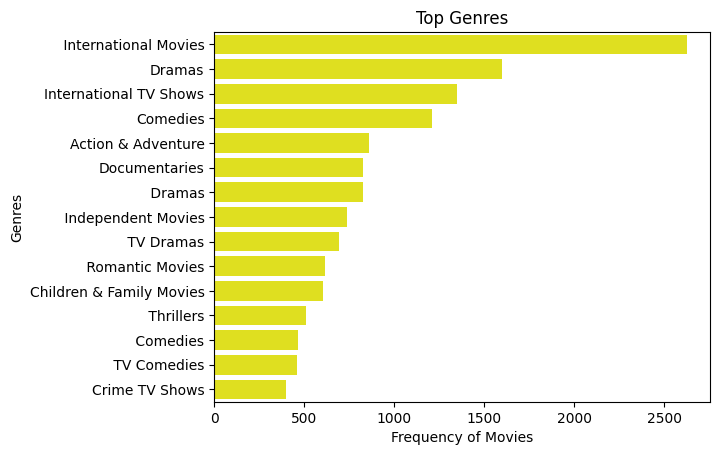

In [97]:
sns.barplot(x='title',y='listed_in',data=df_genre,color='yellow')
plt.xlabel('Frequency of Movies')
plt.ylabel('Genres')
plt.title('Top Genres')
plt.show()

International Movies, Dramas and Comedies are popular

In [38]:
final['country'] = final['country'].str.replace(',',"")
final['country'] = final['country'].replace(' United States','United States')

df_country = final.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
df_country

,country,title
0,United States,4249
1,India,1093
2,United Kingdom,650
3,Japan,278
4,Canada,277
5,France,221
6,South Korea,214
7,Unknown Country,200
8,France,193
9,Spain,186


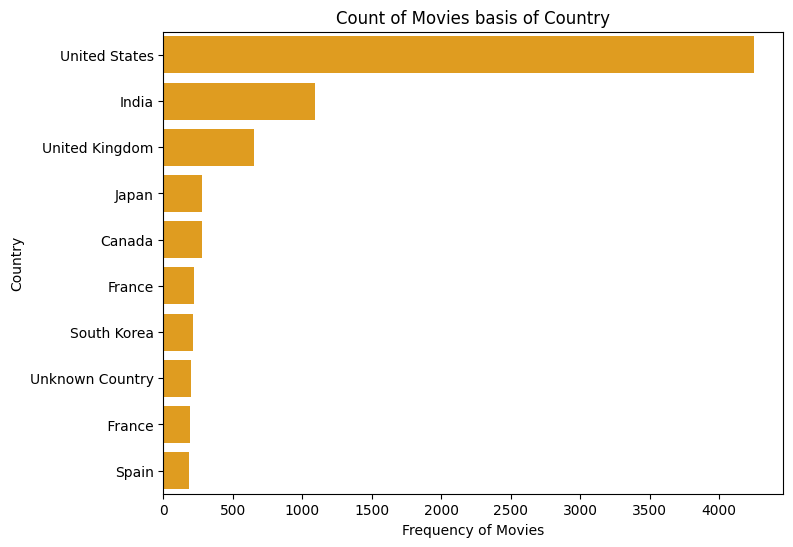

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_country, x='title',y='country',color='orange')
plt.xlabel('Frequency of Movies')
plt.ylabel('Country')
plt.title('Count of Movies basis of Country')
plt.show()

United States, India and United Kingdom are the top3 countries leading in Netflix

In [40]:
# Count of title basis of type
df_type = final.groupby('type')['title'].nunique().sort_values(ascending=False).reset_index()
df_type

,type,title
0,Movie,6131
1,TV Show,2676


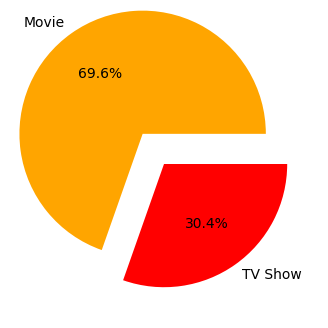

In [41]:
plt.figure(figsize=(6,4))
plt.pie(df_type['title'],labels=df_type['type'],explode=(0.3,0),colors=['orange','red'], autopct='%.1f%%')
plt.show()

70% of the contents are Movies and remaining 30% is TV Shows

In [42]:
#number of distinct titles on the basis of rating
df_rating = final.groupby('rating')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
df_rating

,rating,title
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,87


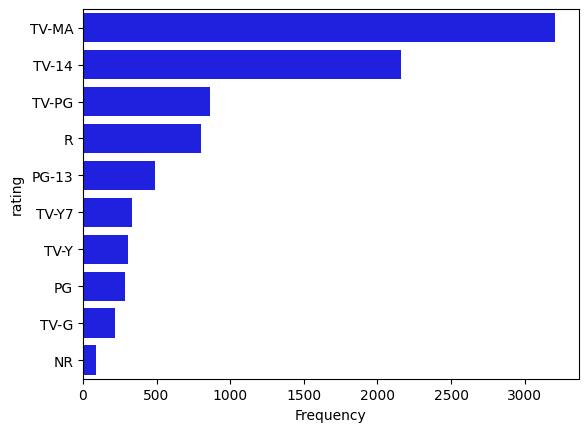

In [43]:
sns.barplot(data=df_rating,y='rating',x='title',color='blue')
plt.xlabel('Frequency')
plt.ylabel('rating')
plt.show()

Most of the content in Netflix is for Mature Audience, under 14yrs, with Parental Guidance and R-rated content

In [44]:
#number of distinct titles on the basis of duration
df_duration = final.groupby('duration')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
df_duration

,duration,title
0,80-100,2222
1,1 Season,1793
2,100-120,1672
3,120-150,897
4,50-80,808
5,2 Seasons,425
6,1-50,287
7,150-200,226
8,3 Seasons,199
9,4 Seasons,95


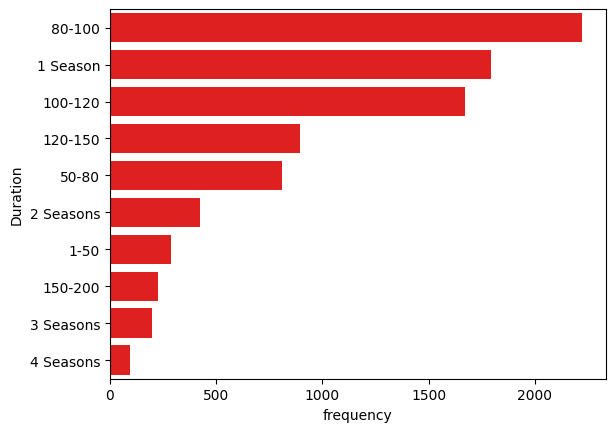

In [45]:
sns.barplot(data=df_duration,x='title',y='duration',color='red')
plt.xlabel('frequency')
plt.ylabel('Duration')
plt.show()

Most of the Movies present are within 80 to 100 mins duration and for TV Shows its Season-1

In [46]:
# Number of distinct titles on the basis of Actors
df_cast = final.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
df_cast = df_cast[df_cast['cast']!='Unknow Actor']
df_cast

,cast,title
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28
5,Om Puri,27
6,Rajesh Kava,26
7,Shah Rukh Khan,26
8,Boman Irani,25
9,Paresh Rawal,25


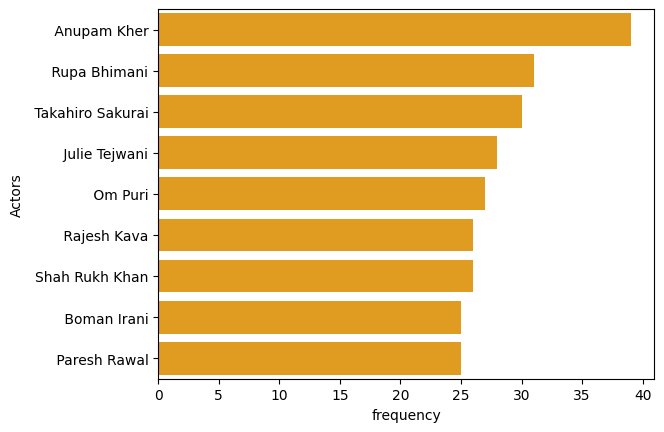

In [47]:
#plt.barh(df_cast[::-1]['cast'],df_cast[::-1]['title'])
sns.barplot(data=df_cast, x='title',y='cast',color='orange')
plt.xlabel('frequency')
plt.ylabel('Actors')
plt.show()

Anumpam Kher, Rupa Bhimani, Takahiro Sakurai, Julie Tejwani and Om puri are the popular actors in Netflix

In [48]:
# Number of distinct title basis of Directors, we remove rows which contains the Unknown director value
df_direc = final.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:20]
df_direc = df_direc[df_direc['director'] != 'Unknown director']
df_direc


,director,title
1,Rajiv Chilaka,22
2,Raúl Campos,18
3,Jan Suter,18
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Jay Chapman,12
10,Martin Scorsese,12


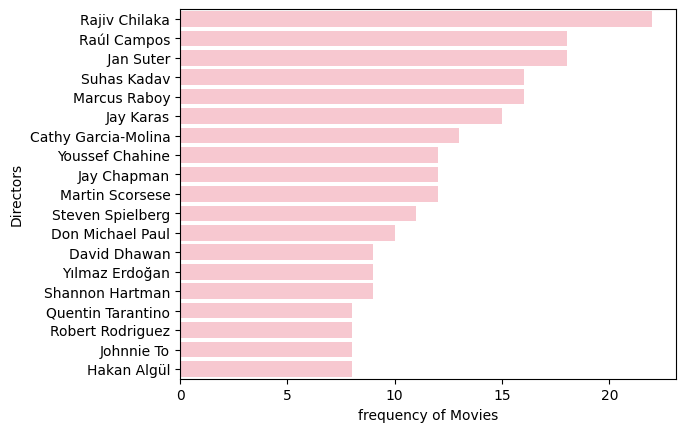

In [49]:
sns.barplot(data=df_direc,x='title',y='director',color='pink')
plt.xlabel('frequency of Movies')
plt.ylabel('Directors')
plt.show()

Rajiv Chilaka, Raul Campos and Jan Suter are the top3 popular directors at Netflix

In [50]:
# Number of distinct titles on the basis of year
df_yr = final.groupby('year_added')['title'].nunique().reset_index()
df_yr

,year_added,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1189


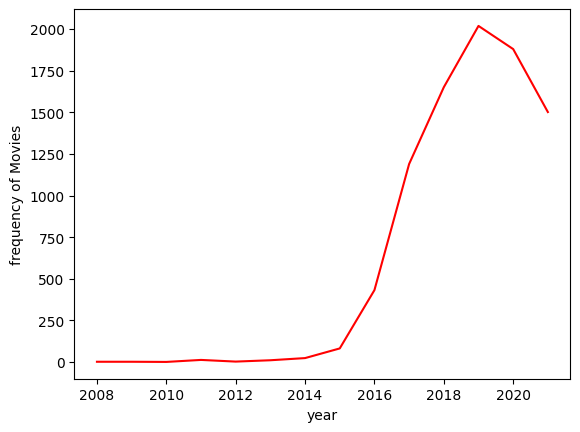

In [51]:
sns.lineplot(x='year_added',y='title',data=df_yr,color='red')
plt.xlabel('year')
plt.ylabel('frequency of Movies')
plt.show()

Almost content release was steady from 2008 to 2014 and increased to nearly 2000 by 2019 and begins to drop afterwards possible due to covid

In [52]:
# Number of titles on the basis of weeks
df_week = final.groupby('week_added')['title'].nunique().reset_index()
df_week

,week_added,title
0,1,372
1,2,108
2,3,113
3,4,88
4,5,208
5,6,97
6,7,147
7,8,110
8,9,254
9,10,135


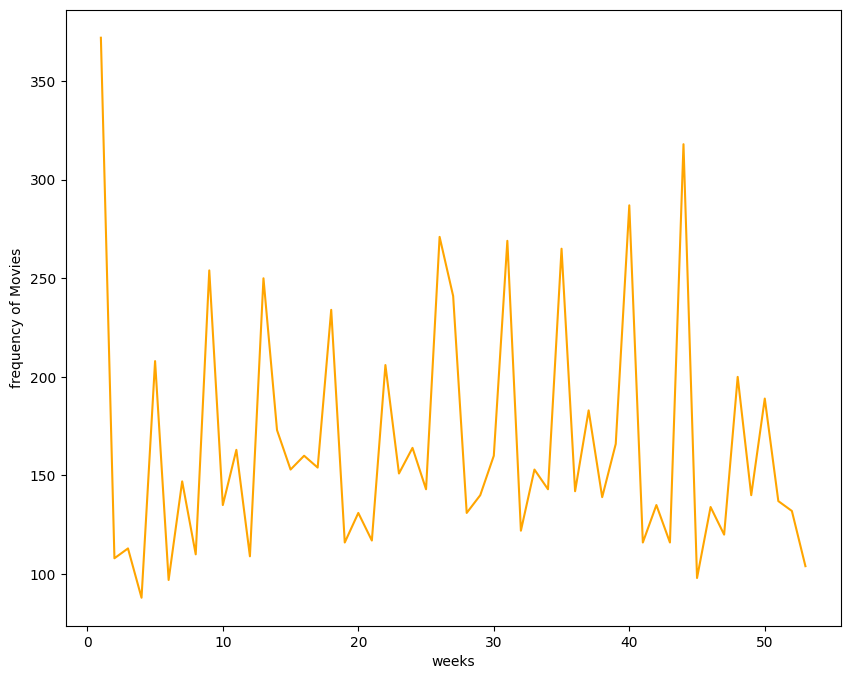

In [53]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_week,x='week_added',y='title',color='orange')
plt.xlabel('weeks')
plt.ylabel('frequency of Movies')
plt.show()

Most contents are added in the first week of the year

In [54]:
# movies count based on months
df_month = final.groupby('month_added')['title'].nunique().reset_index()
df_month

,month_added,title
0,1,738
1,2,563
2,3,742
3,4,765
4,5,632
5,6,728
6,7,832
7,8,756
8,9,772
9,10,760


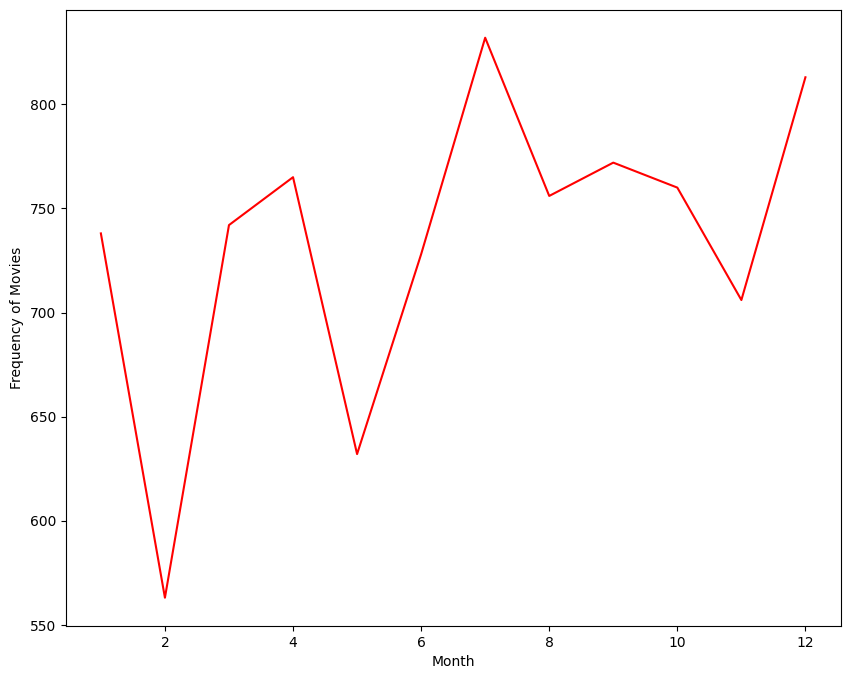

In [55]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_month,x='month_added',y='title',color='red')
plt.xlabel('Month')
plt.ylabel('Frequency of Movies')
plt.show()

Most of the contents are added in the Jan, May, July and December of the year

In [56]:
# Unique titles basis of release year :
df_release_yr = final[final['release_year']>=1980].groupby('release_year')['title'].nunique().reset_index()
df_release_yr

,release_year,title
0,1980,11
1,1981,13
2,1982,17
3,1983,11
4,1984,12
5,1985,10
6,1986,13
7,1987,8
8,1988,18
9,1989,16


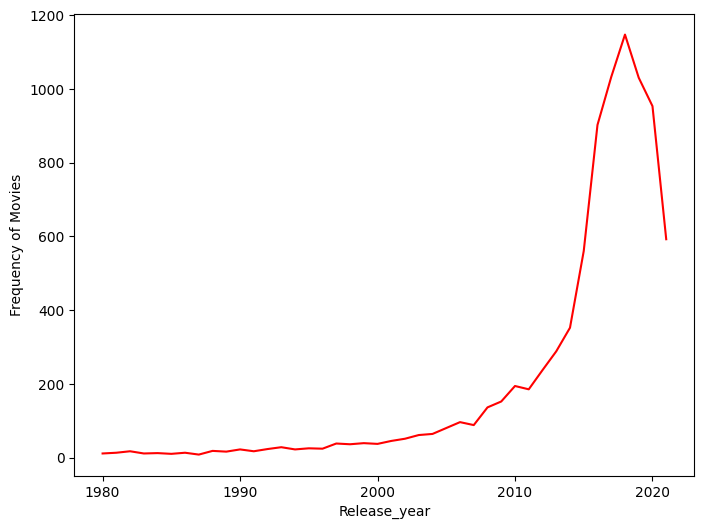

In [57]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df_release_yr,x='release_year',y='title',color='red')
plt.xlabel('Release_year')
plt.ylabel('Frequency of Movies')
plt.show()

Netflix content was increasing from 1980 till 2019 and then it starts reducing

### Univariante Analysis - Separatly for Movies and TV Shows

In [58]:
# Lets compare the count of title separatly for Movies and TV Shows
df_shows = final[final['type']=='TV Show']
df_movies = final[final['type']=='Movie']

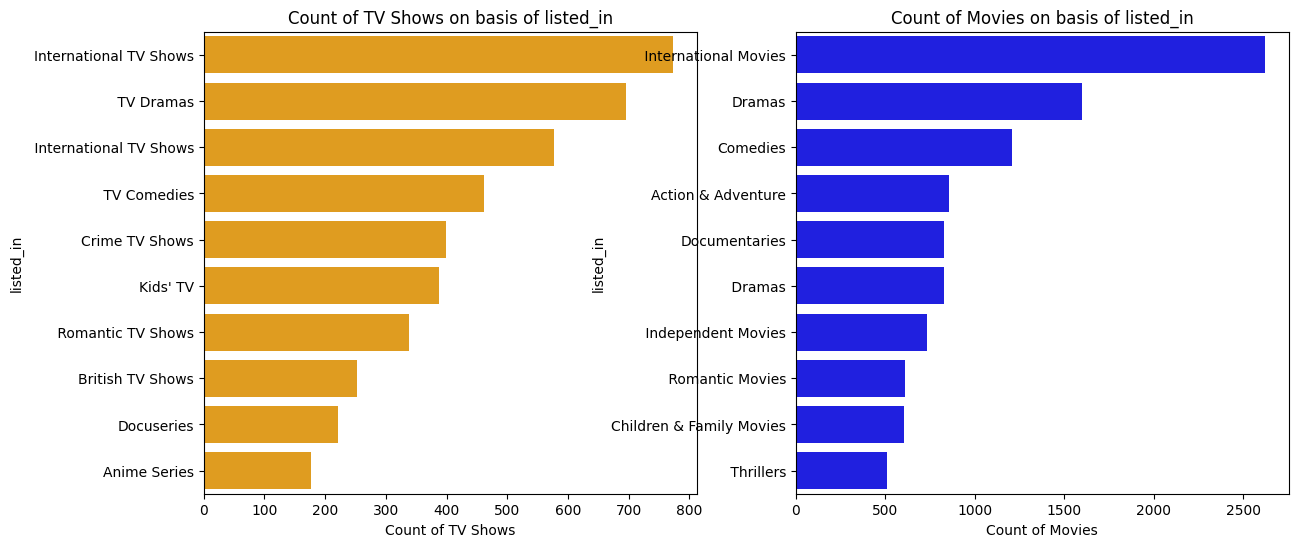

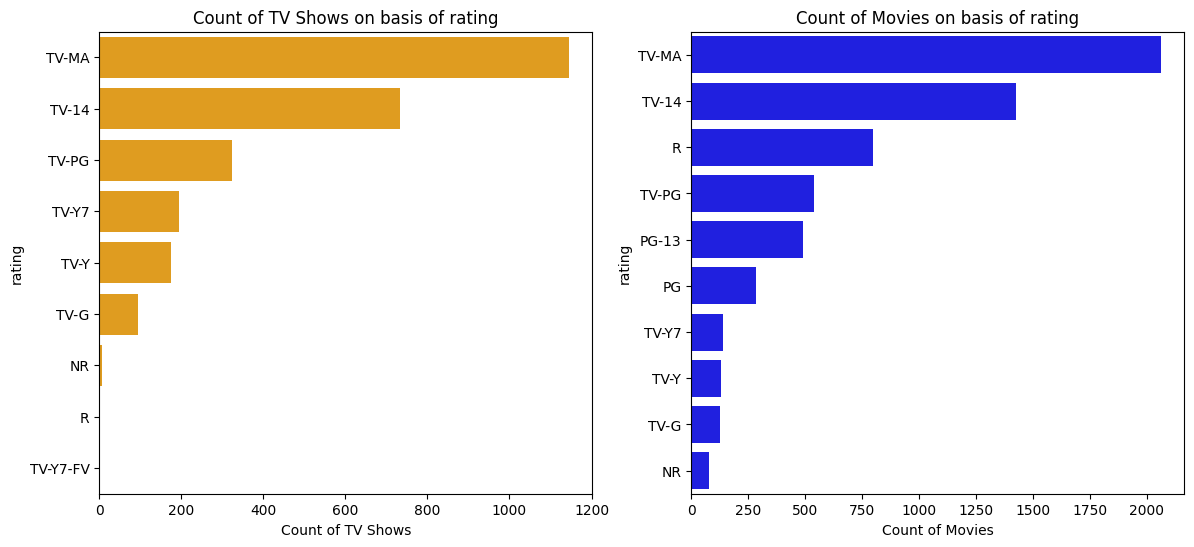

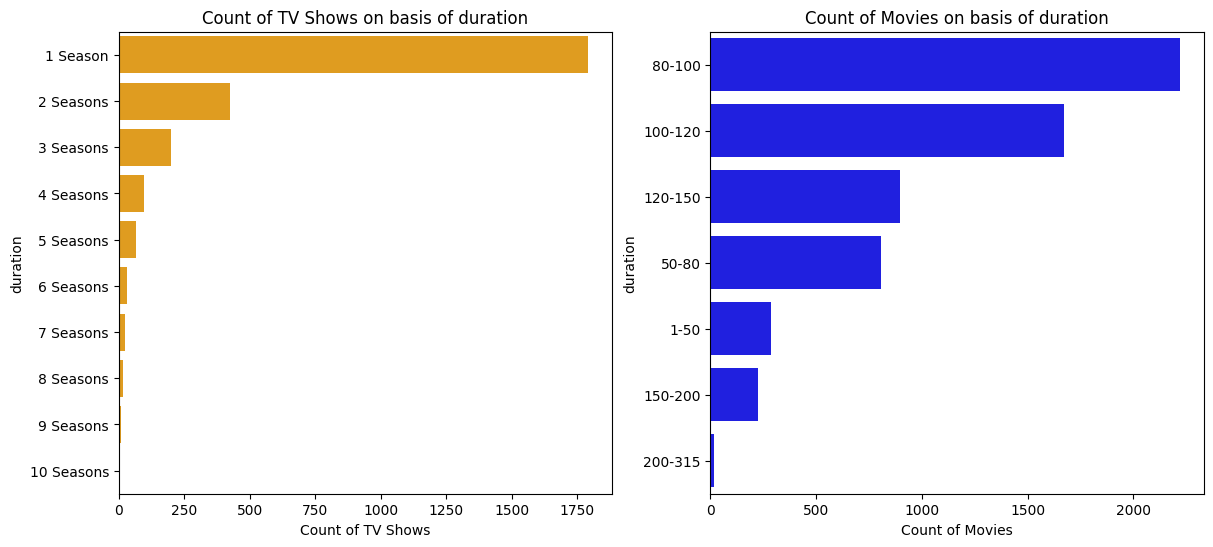

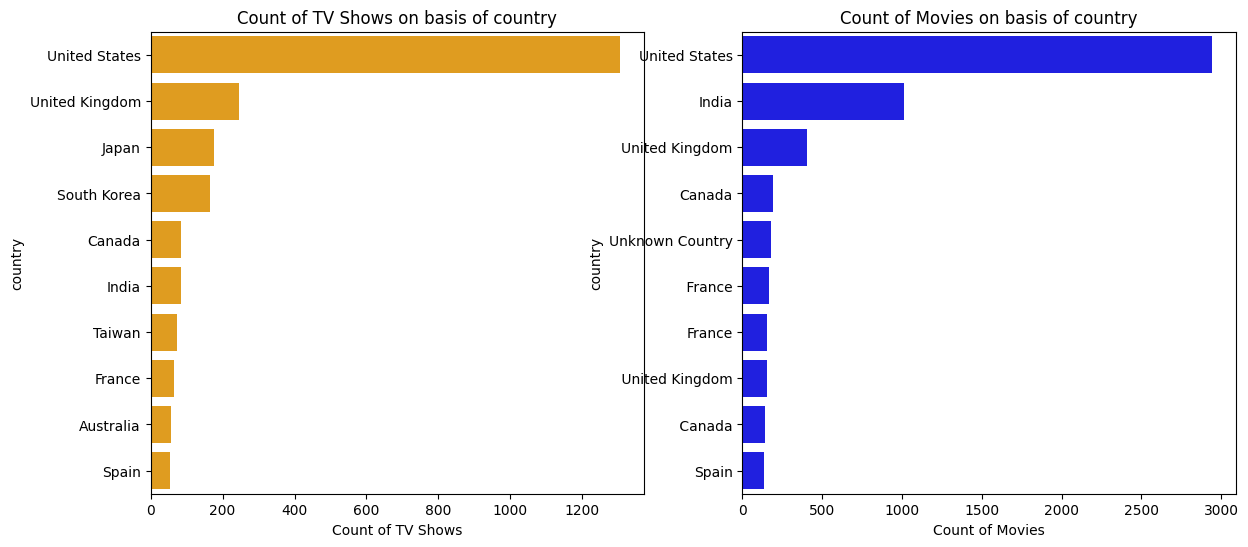

In [59]:
# Create a subplots which shows movies analysis on the right side and TV shows analysis on the left side, comparison was made with Genres, rating, Duration and country columns
col = ['listed_in', 'rating', 'duration','country']
for i in col:
  shows = df_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:10]
  movies = df_movies.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:10]
  plt.figure(figsize=(14,6))
  plt.subplot(1,2,1)
  sns.barplot(data=shows, x='title',y=i,color='orange')
  plt.xlabel('Count of TV Shows')
  plt.title(f"Count of TV Shows on basis of {i}")

  plt.subplot(1,2,2)
  sns.barplot(data=movies, x='title',y=i,color='blue')
  plt.xlabel('Count of Movies')
  plt.title(f"Count of Movies on basis of {i}")
  plt.show()

* International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix
* International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix
* United States is leading in Movies and TV Shows, India is leading in Movies compared to TV Shows
* Number of movies created in India is more than the sum of movies and tvshows in UK
* Popular content in movies are mature audience and those appropriate for over 14yrs and 17yrs and same for TV shows as well
* Duration in TV Shows are mostly season 1 and for movies 80-100, 100-120, 120-150 are the most popular duration of movies on Netflix

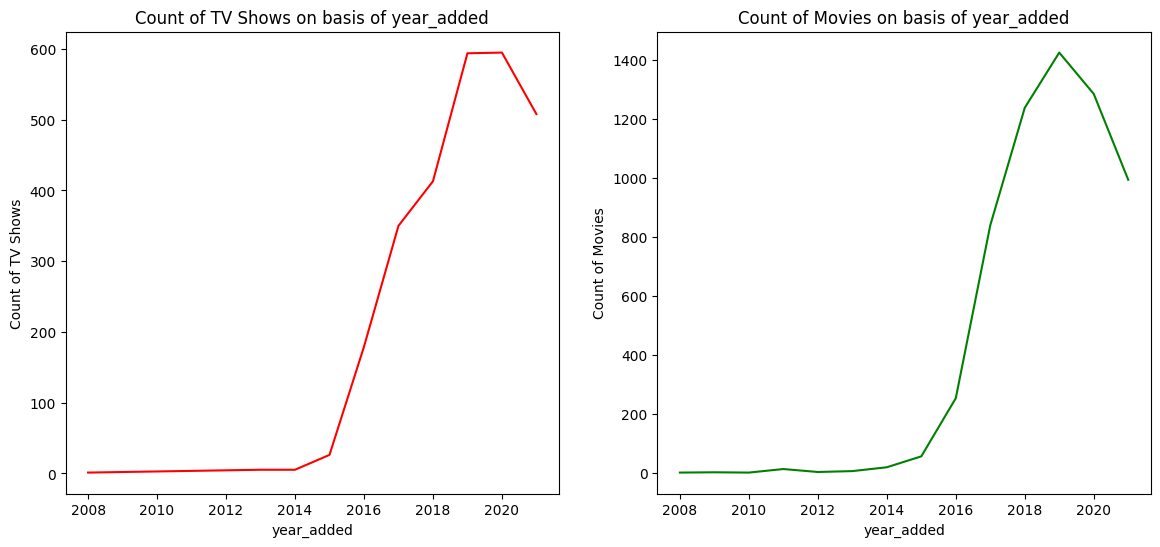

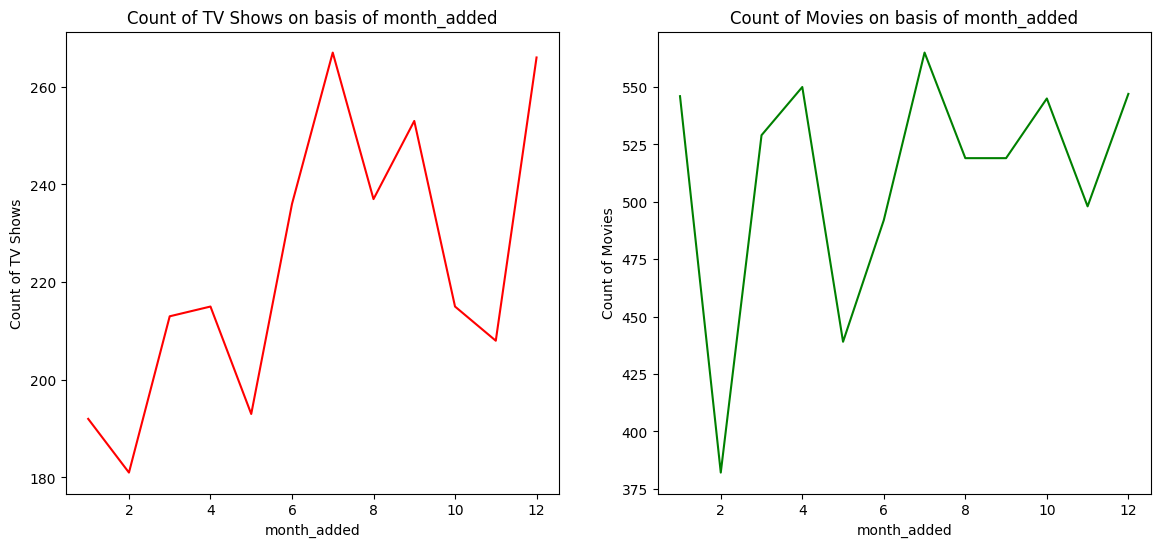

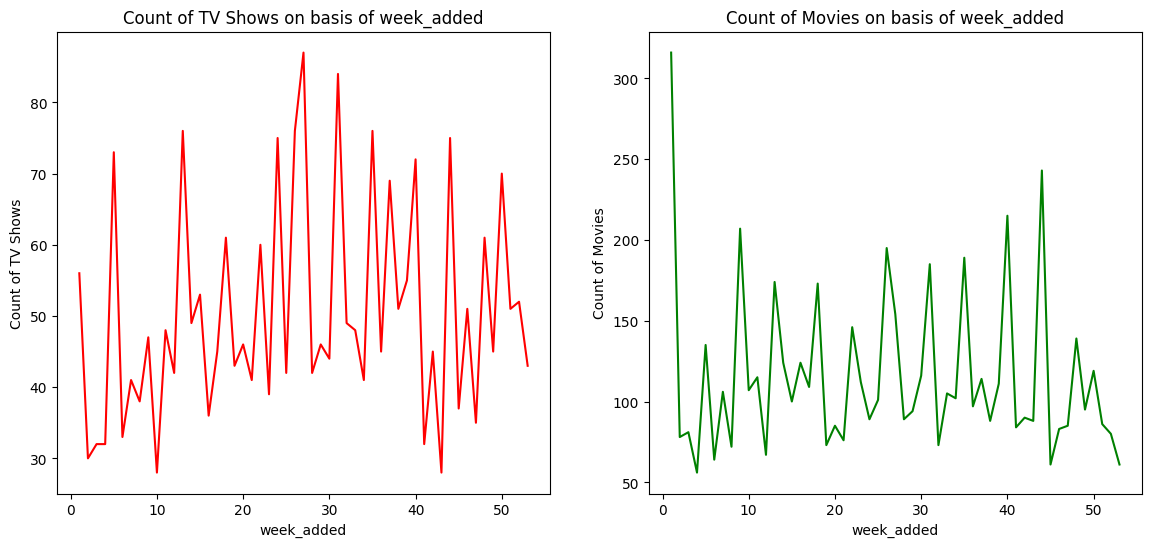

In [60]:
# Analysis on basis of years_added, month_added and week_added columns
col = ['year_added', 'month_added', 'week_added']
for i in col:
  shows = df_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()
  movies = df_movies.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()
  plt.figure(figsize=(14,6))
  plt.subplot(1,2,1)
  sns.lineplot(data=shows, y='title',x=i,color='red')
  plt.ylabel('Count of TV Shows')
  plt.title(f"Count of TV Shows on basis of {i}")

  plt.subplot(1,2,2)
  sns.lineplot(data=movies, y='title',x=i,color='green')
  plt.ylabel('Count of Movies')
  plt.title(f"Count of Movies on basis of {i}")
  plt.show()

TV shows are added on the mid weeks or months of the year (july) and for Movies are added the most on first week / last month of the year and first month of the next year.

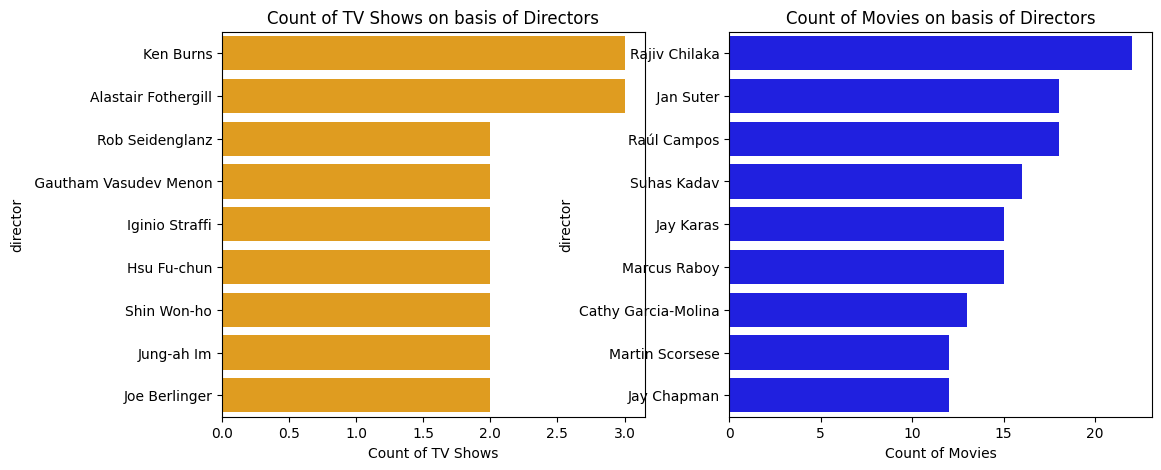

In [61]:
# Number of titles of Movies and TV Shows on basis of Director column
shows = df_shows.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows = shows[shows['director'] != 'Unknown director']

movies = df_movies.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
movies = movies[movies['director'] != 'Unknown director']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=shows, x='title',y='director',color='orange')
plt.xlabel('Count of TV Shows')
plt.title(f"Count of TV Shows on basis of Directors")

plt.subplot(1,2,2)
sns.barplot(data=movies, x='title',y='director',color='blue')
plt.xlabel('Count of Movies')
plt.title(f"Count of Movies on basis of Directors")
plt.show()

Popular director on TV Shows are Ken Burns, Alastair, Rob Seidenglanz and for movies poplular directors are Rajiv Chilaka, Jan suter and Raul campos

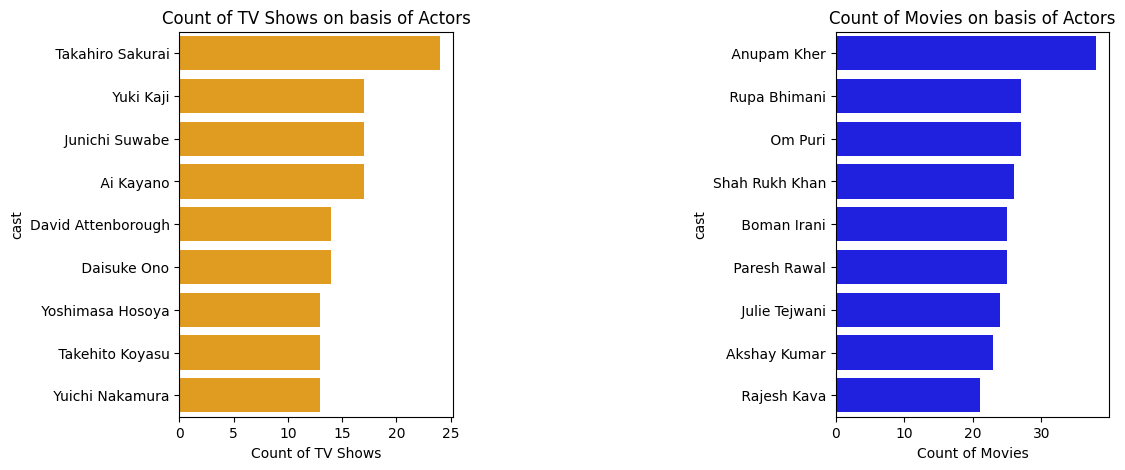

In [62]:
# Number of unique titles of Movies and TV Shows on basis of cast
shows = df_shows.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows = shows[shows['cast'] != 'Unknow Actor']

movies = df_movies.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
movies = movies[movies['cast'] != 'Unknow Actor']

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.barplot(data=shows, x='title',y='cast',color='orange')
plt.xlabel('Count of TV Shows')
plt.title(f"Count of TV Shows on basis of Actors")

plt.subplot(1,3,3)
sns.barplot(data=movies, x='title',y='cast',color='blue')
plt.xlabel('Count of Movies')
plt.title(f"Count of Movies on basis of Actors")
plt.show()

Popular cast in TV Shows are Takahiro sakurai, Yuki kaji and Junichi Suwabe and for Movies top cast are Anupan Kher, Rupa Bhimani and Om Puri

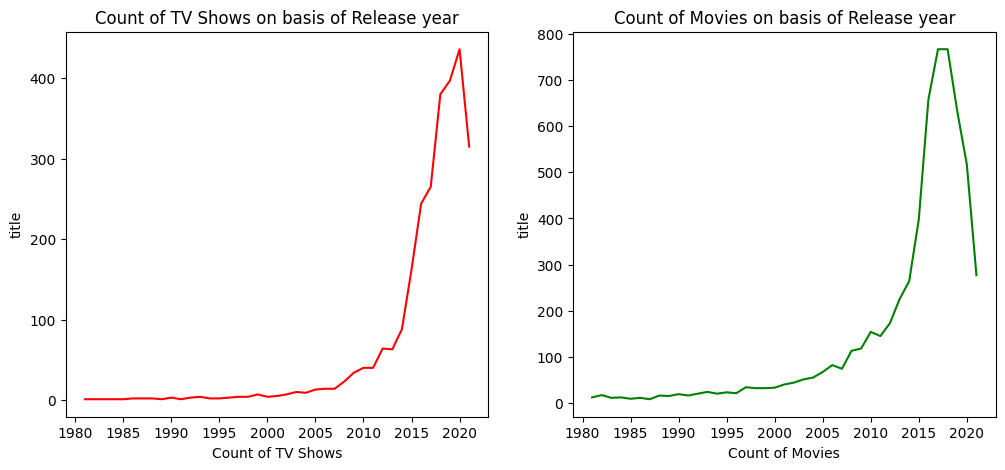

In [63]:
shows = df_shows[df_shows['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()

movies = df_movies[df_movies['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(data=shows, y='title',x='release_year',color='red')
plt.xlabel('Count of TV Shows')
plt.title(f"Count of TV Shows on basis of Release year")

plt.subplot(1,2,2)
sns.lineplot(data=movies, y='title',x='release_year',color='green')
plt.xlabel('Count of Movies')
plt.title(f"Count of Movies on basis of Release year")
plt.show()

Movies and TV Shows both dropped afer 2019

There are countries which does better in both TV shows and Movies such as United States and India.  
Do analysis on rating, duration, Genres, directors and cast and date_added columns for these two countries and also we need to find the Actor and Director combination who contributes higher count of content in Netflix.

In [99]:
#TV Shows and Movies for United states and India
# Lets calculate for United States :
df_usa_movies = final[(final['country']=='United States') & (final['type']=='Movie')]
df_usa_shows = final[(final['country']=='United States') & (final['type']=='TV Show')]

## Univariante Analysis for United States for TV Shows and Movies separately

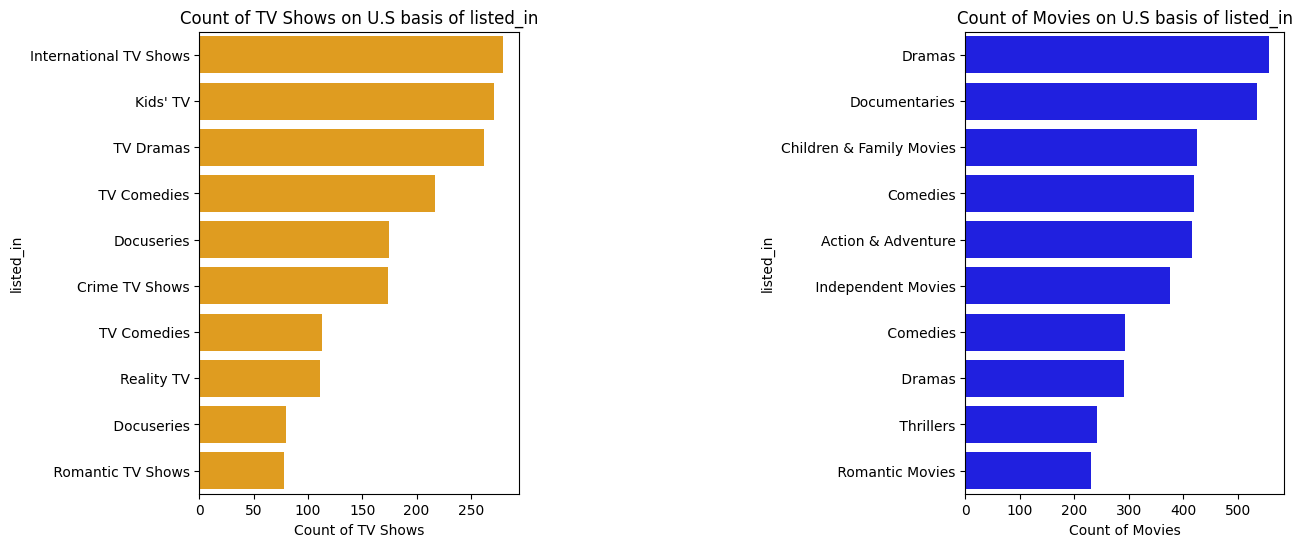

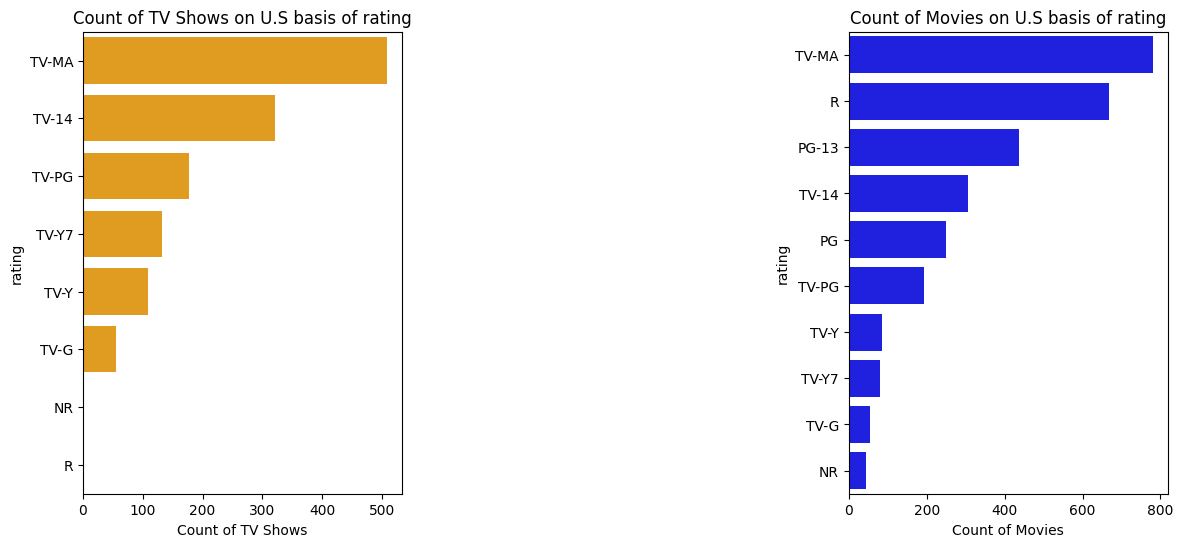

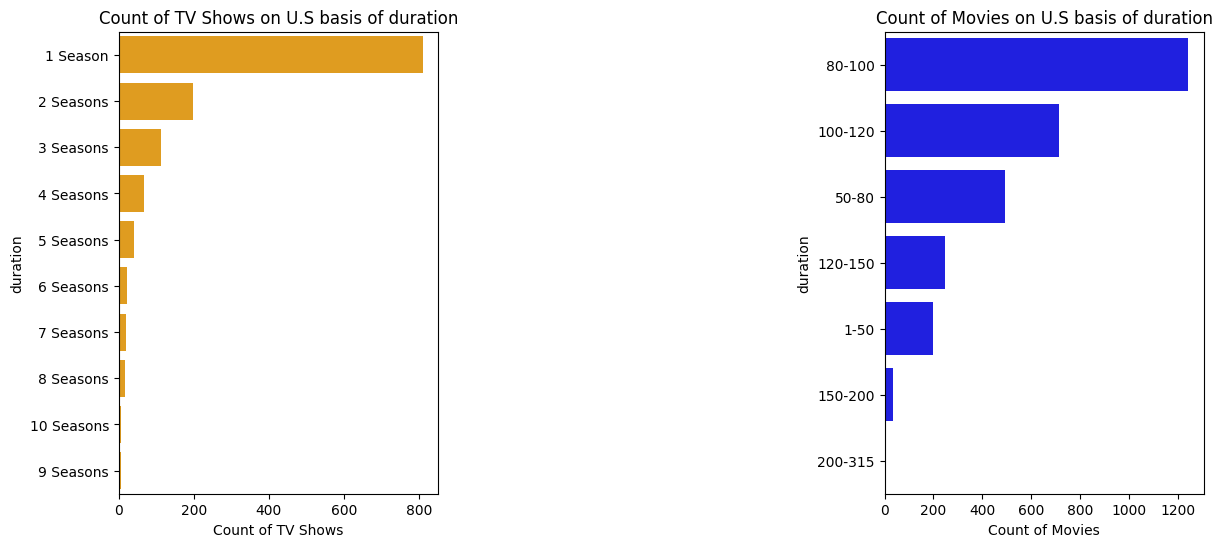

In [100]:
col = ['listed_in', 'rating', 'duration']
for i in col:
  shows = df_usa_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:10]
  movies = df_usa_movies.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:10]
  plt.figure(figsize=(14,6))
  plt.subplot(1,3,1)
  sns.barplot(data=shows, x='title',y=i,color='orange')
  plt.xlabel('Count of TV Shows')
  plt.title(f"Count of TV Shows on U.S basis of {i}")

  plt.subplot(1,3,3)
  sns.barplot(data=movies, x='title',y=i,color='blue')
  plt.xlabel('Count of Movies')
  plt.title(f"Count of Movies on U.S basis of {i}")
  plt.show()

* Drama, comedy and kids TV Shows are popular genres in TV shows and Dramas, comedy and Documentaries are popular genres in Movies at United States
* Popular rating in Netflix are Mature audience and those appropriate for 14yrs and 17yrs for both Movies and TV Shows
* Across duration range of 80-100 and 100-120 are popular in Movies and Season1 in tv shows

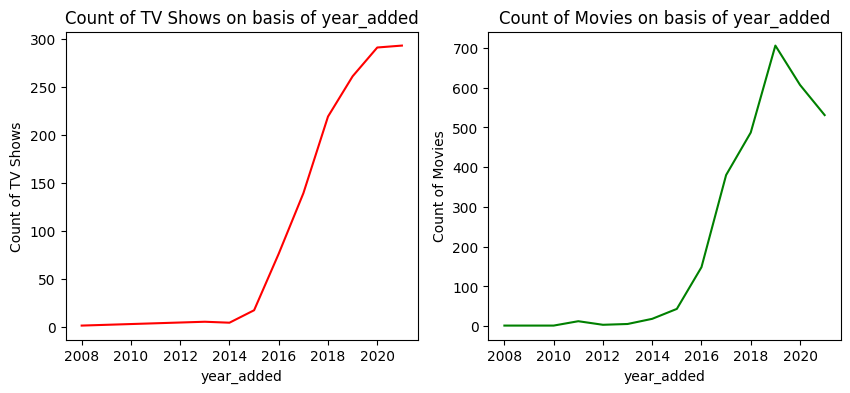

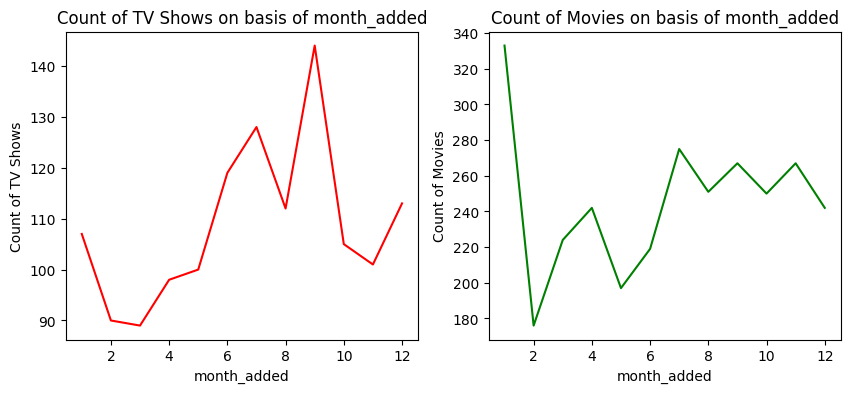

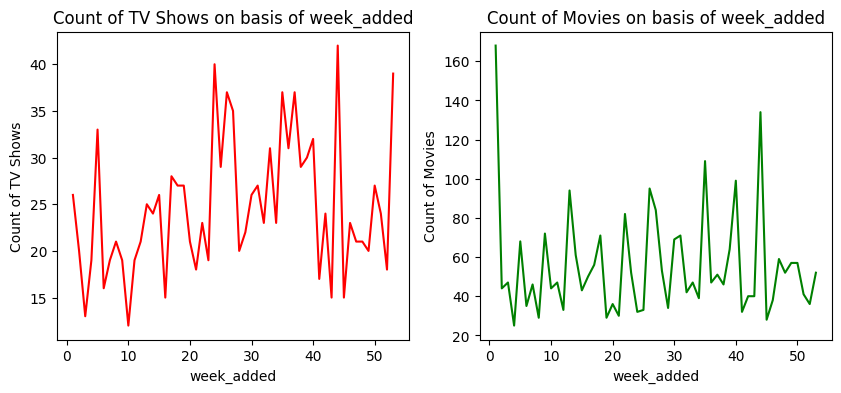

In [66]:
col = ['year_added', 'month_added', 'week_added']
for i in col:
  shows = df_usa_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()
  movies = df_usa_movies.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  sns.lineplot(data=shows, y='title',x=i,color='red')
  plt.ylabel('Count of TV Shows')
  plt.title(f"Count of TV Shows on basis of {i}")

  plt.subplot(1,2,2)
  sns.lineplot(data=movies, y='title',x=i,color='green')
  plt.ylabel('Count of Movies')
  plt.title(f"Count of Movies on basis of {i}")
  plt.show()

* Number of Tvshows remains the same from 2019 but in movies it dropped after 2019
* TV shows are added on July and september in USA and movies are added on first week/last month of current year and first month of next year

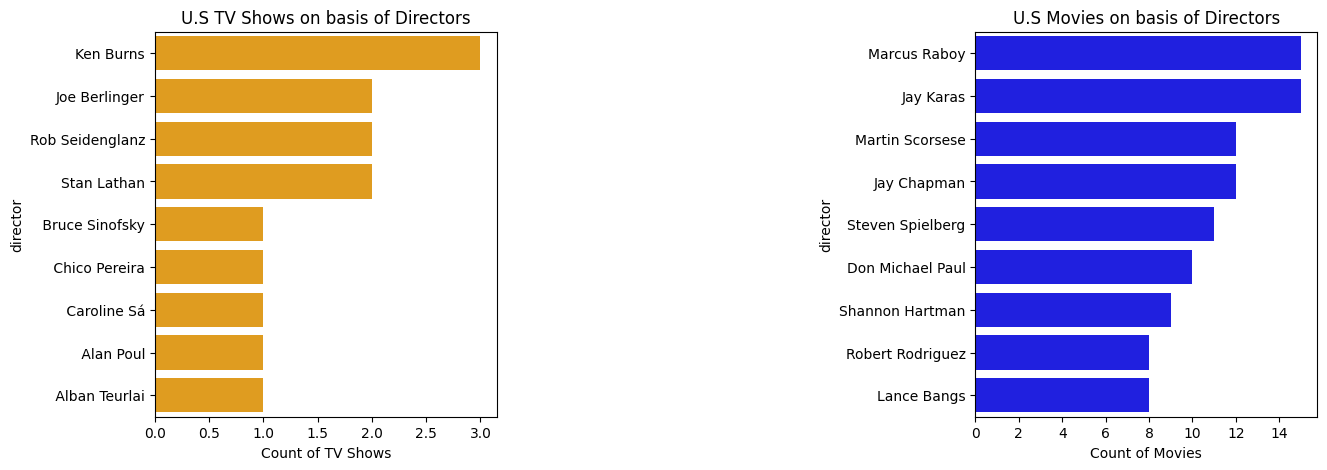

In [67]:
shows = df_usa_shows.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows = shows[shows['director'] != 'Unknown director']

movies = df_usa_movies.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
movies = movies[movies['director'] != 'Unknown director']

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=shows, x='title',y='director',color='orange')
plt.xlabel('Count of TV Shows')
plt.title(f"U.S TV Shows on basis of Directors")

plt.subplot(1,3,3)
sns.barplot(data=movies, x='title',y='director',color='blue')
plt.xlabel('Count of Movies')
plt.title(f"U.S Movies on basis of Directors")
plt.show()

* Marcus Raboy, Jay karas and Martin Scorsese are the top 3 popular directors in movies category
* Ken Burns, Joe Berlinger and Rob Seidenglanz are the top 3 popular directors in tv shows category

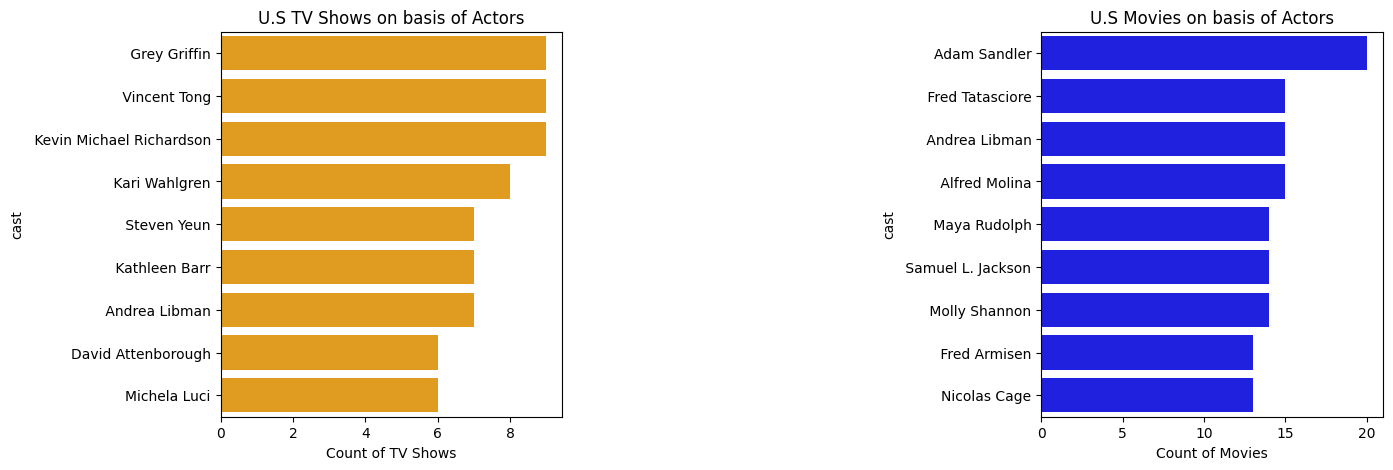

In [68]:
shows = df_usa_shows.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows = shows[shows['cast'] != 'Unknow Actor']

movies = df_usa_movies.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
movies = movies[movies['cast'] != 'Unknow Actor']

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=shows, x='title',y='cast',color='orange')
plt.xlabel('Count of TV Shows')
plt.title(f"U.S TV Shows on basis of Actors")

plt.subplot(1,3,3)
sns.barplot(data=movies, x='title',y='cast',color='blue')
plt.xlabel('Count of Movies')
plt.title(f"U.S Movies on basis of Actors")
plt.show()

* Adam sandler, Fred Tatasciore and Andrea Libman are the popular cast in movies in Netflix
* Grey griffin, Vincent Tong, Kevin Michael are the popular cast in TV shows in Netflix

<ipython-input-69-1be0affe672d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shows = df_usa_shows[df_shows['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()
<ipython-input-69-1be0affe672d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies = df_usa_movies[df_movies['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()


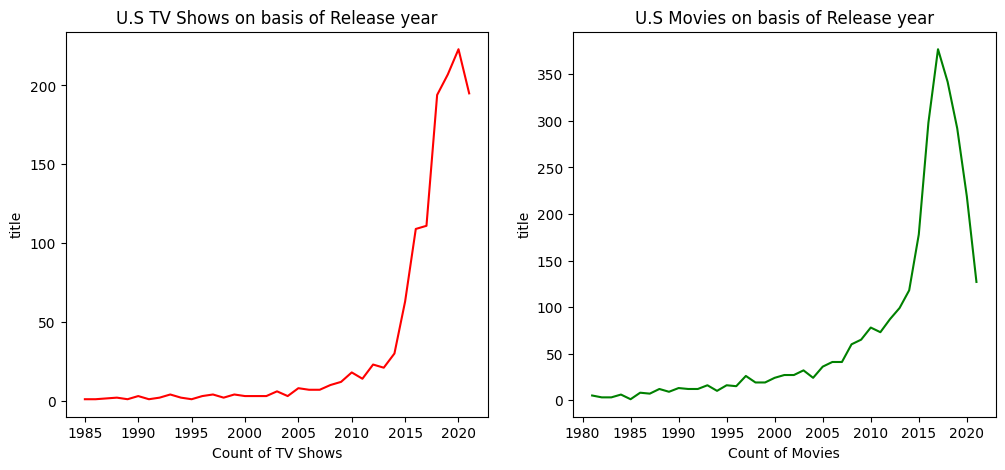

In [69]:
shows = df_usa_shows[df_shows['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()

movies = df_usa_movies[df_movies['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(data=shows, y='title',x='release_year',color='red')
plt.xlabel('Count of TV Shows')
plt.title(f"U.S TV Shows on basis of Release year")

plt.subplot(1,2,2)
sns.lineplot(data=movies, y='title',x='release_year',color='green')
plt.xlabel('Count of Movies')
plt.title(f"U.S Movies on basis of Release year")
plt.show()

In USA, though both Movies and Shows have reduced in 2021, the amount of decrease in number of TV Shows is small as compared to Movies

In [70]:
# lets analyse the Actors and Directors combinations for Movies and TV Shows
df_usa_movies['actor_director_combi'] = df_usa_movies.cast.str.cat(df_usa_movies.director,sep=' and ')
movies_actor_director = df_usa_movies[df_usa_movies['director'] != 'Unknown director']
movies_actor_director = movies_actor_director[movies_actor_director['cast'] != 'Unknow Actor']
movies_actor_director.head()

<ipython-input-70-98163577406e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_movies['actor_director_combi'] = df_usa_movies.cast.str.cat(df_usa_movies.director,sep=' and ')


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,modified_date,year_added,month_added,week_added,actor_director_combi
159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,2021,9,38,Vanessa Hudgens and Robert Cullen
160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,2021,9,38,Kimiko Glenn and Robert Cullen
161,My Little Pony: A New Generation,Robert Cullen,James Marsden,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,2021,9,38,James Marsden and Robert Cullen
163,My Little Pony: A New Generation,Robert Cullen,Liza Koshy,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,2021,9,38,Liza Koshy and Robert Cullen
164,My Little Pony: A New Generation,Robert Cullen,Ken Jeong,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,2021,9,38,Ken Jeong and Robert Cullen


In [71]:
df_usa_shows['actor_director_combi'] = df_usa_shows.cast.str.cat(df_usa_shows.director,sep=' and ')
shows_actor_director = df_usa_shows[df_usa_shows['director']!='Unknown director']
shows_actor_director = shows_actor_director[shows_actor_director['cast']!='Unknow Actor']
shows_actor_director.head()

<ipython-input-71-6c9d6a42a33e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_shows['actor_director_combi'] = df_usa_shows.cast.str.cat(df_usa_shows.director,sep=' and ')


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,modified_date,year_added,month_added,week_added,actor_director_combi
111,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Dramas,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,2021,9,38,Kate Siegel and Mike Flanagan
112,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Horror,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,2021,9,38,Kate Siegel and Mike Flanagan
113,Midnight Mass,Mike Flanagan,Kate Siegel,United States,TV Mysteries,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,2021,9,38,Kate Siegel and Mike Flanagan
114,Midnight Mass,Mike Flanagan,Zach Gilford,United States,TV Dramas,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,2021,9,38,Zach Gilford and Mike Flanagan
115,Midnight Mass,Mike Flanagan,Zach Gilford,United States,TV Horror,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,2021,9,38,Zach Gilford and Mike Flanagan


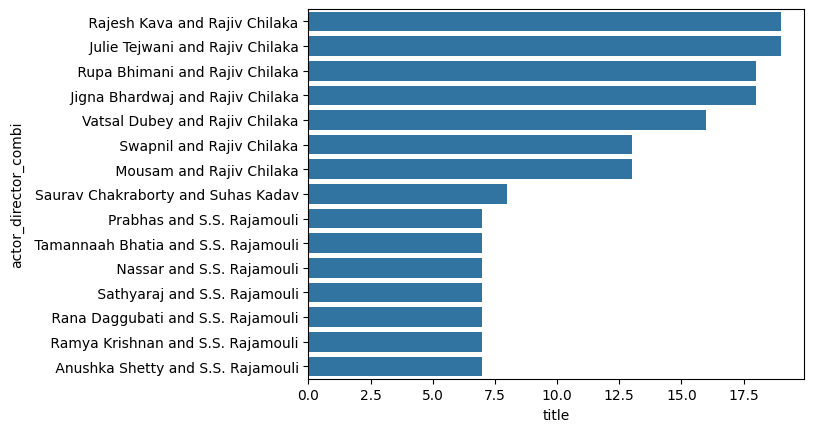

In [101]:
movies = movies_actor_director.groupby('actor_director_combi')['title'].nunique().sort_values(ascending=False).reset_index()[:15]

sns.barplot(data=movies, y='actor_director_combi',x='title')
plt.show()

Popular Actor and Director combination in movies at Netflix,
* Alexa Pena vega and Robert Rodriguez
* Kevin hart and leslie small
* kate higgins and william Lau
* Rory Markham and Mike Gunther
* Rebecca Shoichet and Ishi Rudell

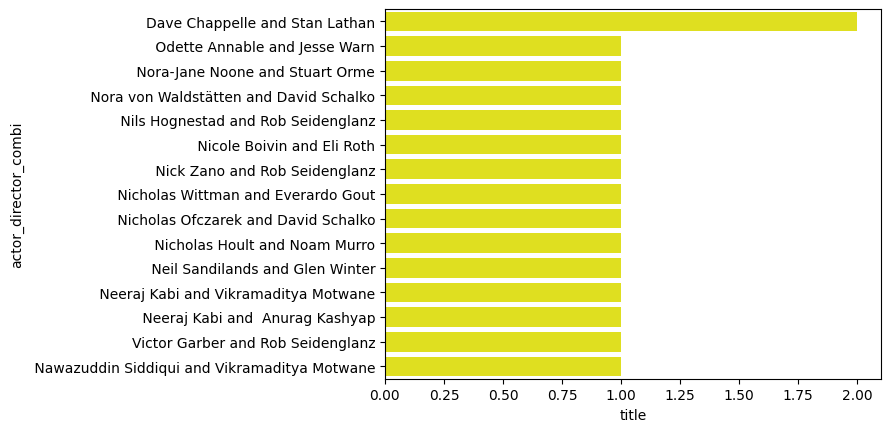

In [73]:
shows = shows_actor_director.groupby('actor_director_combi')['title'].nunique().sort_values(ascending=False).reset_index()[:15]
sns.barplot(data=shows, x='title',y='actor_director_combi',color='yellow')
plt.show()

Popular actor and director combo in TV Shows at Netflix are,
* Dave chappelle and Stan Lathan
* Odette Annable and Jesse Warn
* Nora-Jane Noone and Stuart Orme
* Nora von Waldstatten and David schalko
* Nils Hognestad and Rob Seidenglanz

In [102]:
# we will do the same analysis what we did for country-United States for India as well
indian_movies = final[(final['country']=='India') & (final['type']=='Movie')]
indian_shows = final[(final['country']=='India') & (final['type']=='TV Show')]

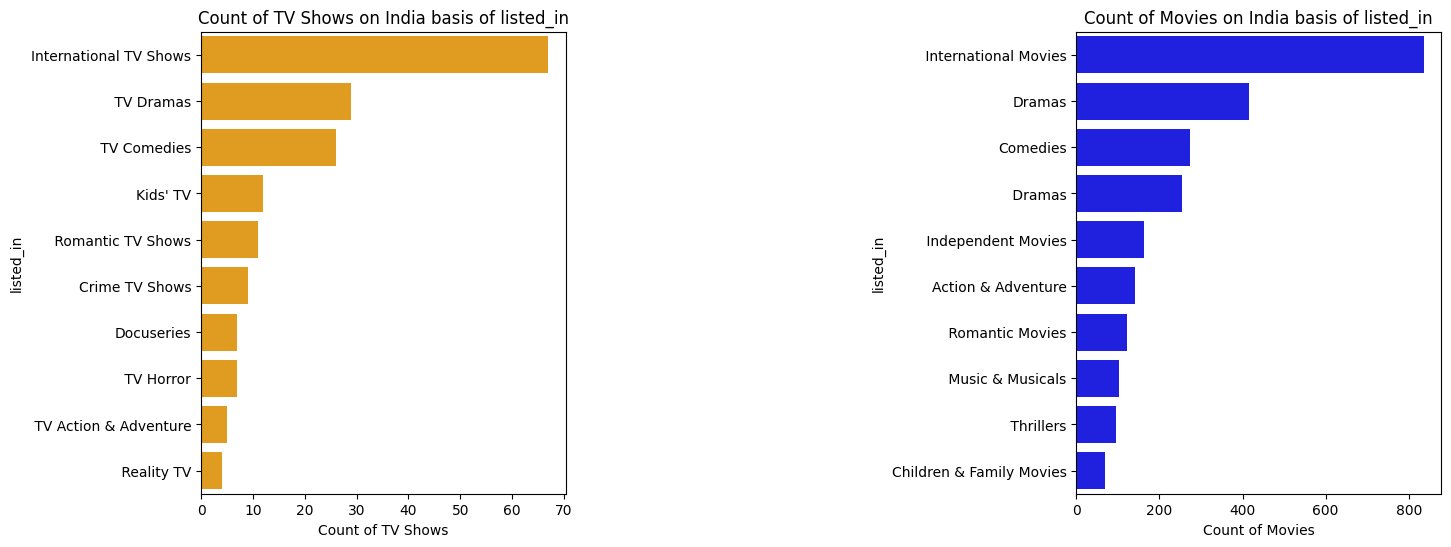

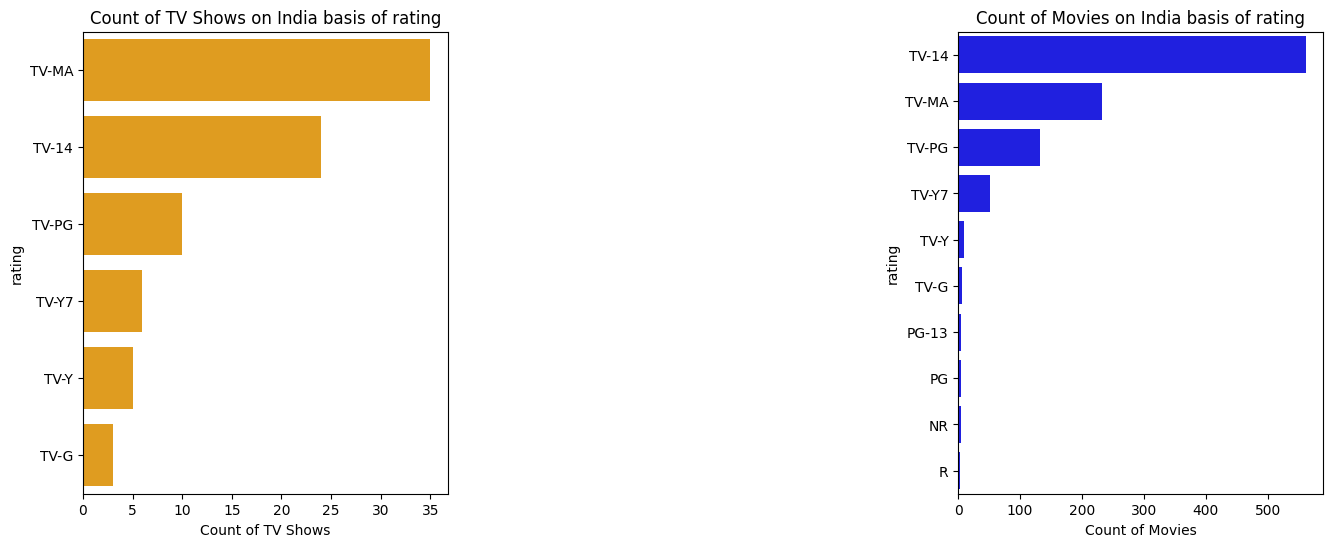

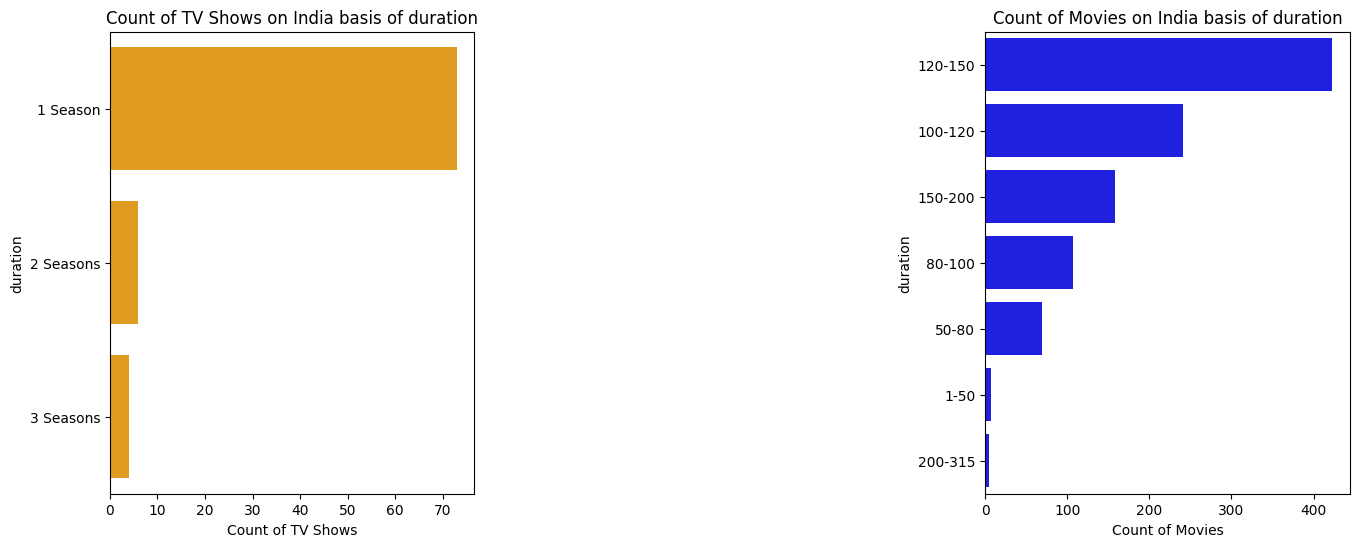

In [103]:
col = ['listed_in', 'rating', 'duration']
for i in col:
  shows = indian_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:10]
  movies = indian_movies.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:10]
  plt.figure(figsize=(16,6))
  plt.subplot(1,3,1)
  sns.barplot(data=shows, x='title',y=i,color='orange')
  plt.xlabel('Count of TV Shows')
  plt.title(f"Count of TV Shows on India basis of {i}")

  plt.subplot(1,3,3)
  sns.barplot(data=movies, x='title',y=i,color='blue')
  plt.xlabel('Count of Movies')
  plt.title(f"Count of Movies on India basis of {i}")
  plt.show()

* Dramas,Comedy, Kids 'TV Shows and International TV Shows Genres are popular in TV Series in India
* International Movies,Drama,Comedy,Indpeendent Movies and Action, Romance Genres are prevalent in India
* Popular ratings across Netflix includes Mature Audiences in TV Shows and those appropriate for people over 14 in Movies.
* Movies in india are greater than USA with range of 120-150 and season 1 for TV shows

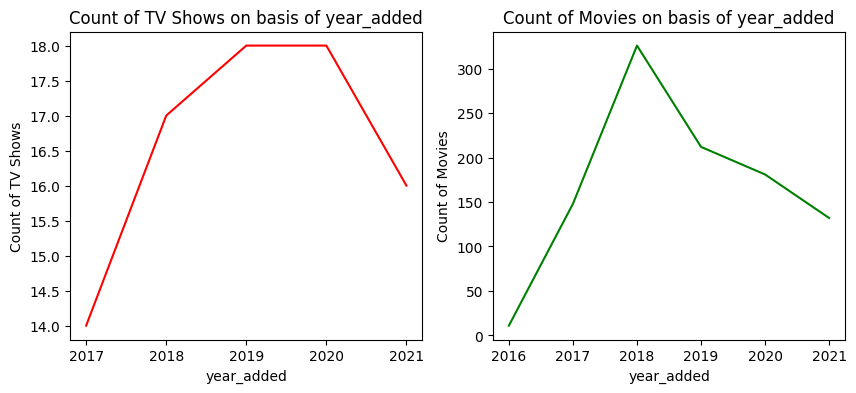

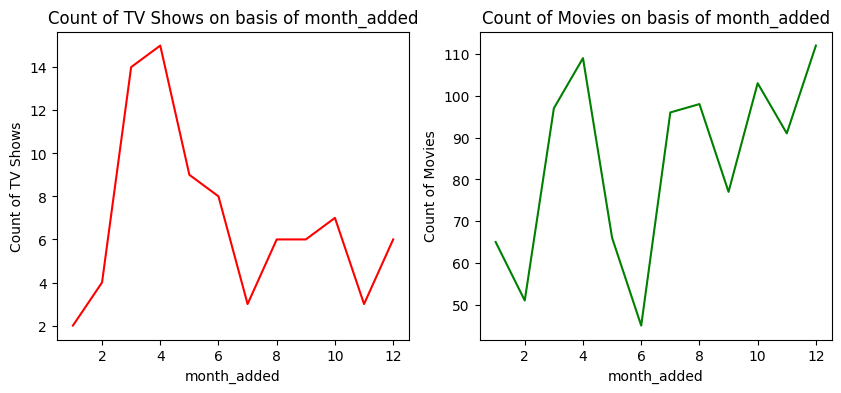

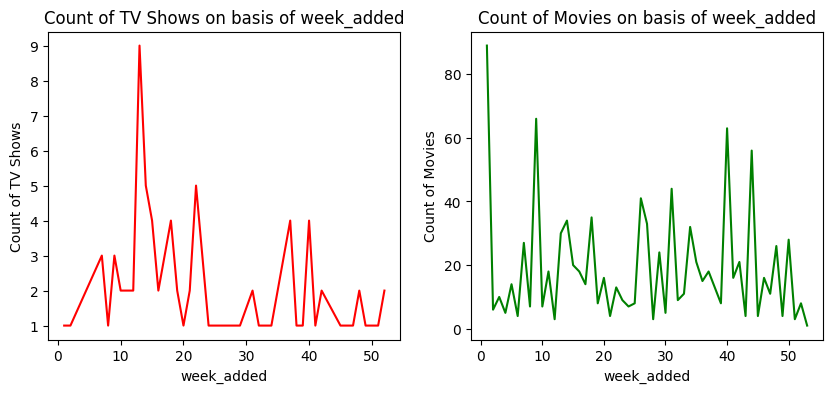

In [76]:
col = ['year_added', 'month_added', 'week_added']
for i in col:
  shows = indian_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()
  movies = indian_movies.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  sns.lineplot(data=shows, y='title',x=i,color='red')
  plt.ylabel('Count of TV Shows')
  plt.title(f"Count of TV Shows on basis of {i}")

  plt.subplot(1,2,2)
  sns.lineplot(data=movies, y='title',x=i,color='green')
  plt.ylabel('Count of Movies')
  plt.title(f"Count of Movies on basis of {i}")
  plt.show()

* TV Shows were increasingly being added till 2020, though the addition of shows reduced in 2021.
* Movies were increasingly added till 2018 but it has been a huge downhill since then.
* TV Shows are added in Netflix by a tremendous amount in April in India
* Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

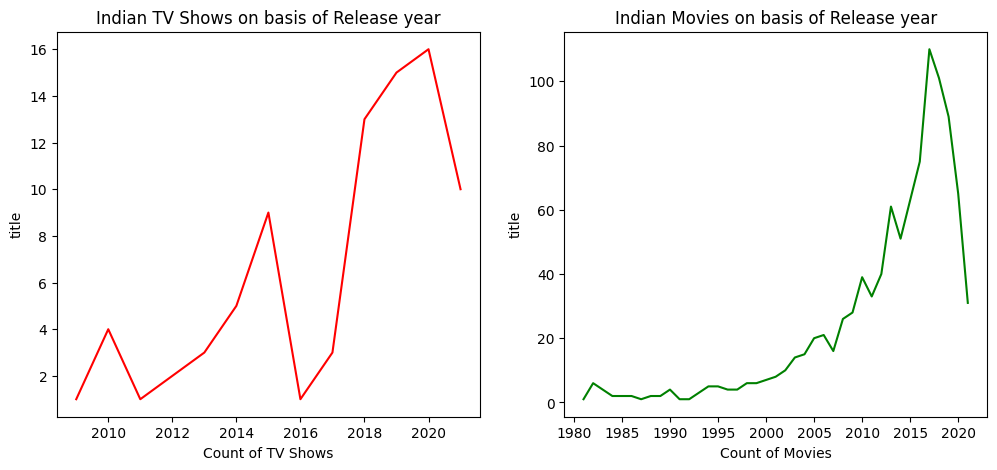

In [77]:
shows = indian_shows[indian_shows['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()

movies = indian_movies[indian_movies['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(data=shows, y='title',x='release_year',color='red')
plt.xlabel('Count of TV Shows')
plt.title(f"Indian TV Shows on basis of Release year")

plt.subplot(1,2,2)
sns.lineplot(data=movies, y='title',x='release_year',color='green')
plt.xlabel('Count of Movies')
plt.title(f"Indian Movies on basis of Release year")
plt.show()

Tv shows dropped from 2019 but less dropped compared to Movies

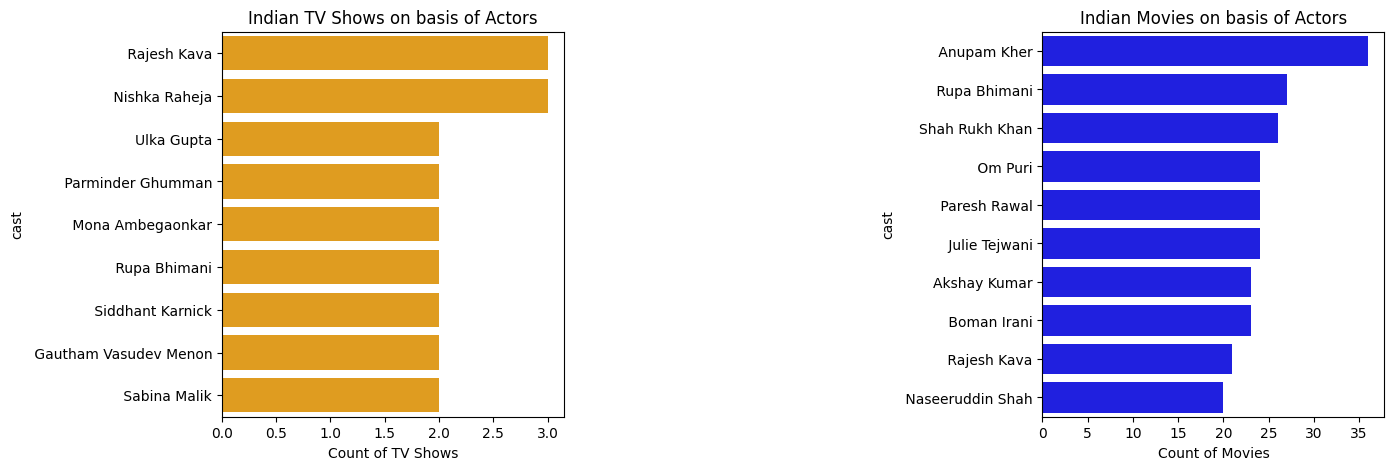

In [78]:
shows = indian_shows.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows = shows[shows['cast'] != 'Unknow Actor']

movies = indian_movies.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
movies = movies[movies['cast'] != 'Unknow Actor']

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=shows, x='title',y='cast',color='orange')
plt.xlabel('Count of TV Shows')
plt.title(f"Indian TV Shows on basis of Actors")

plt.subplot(1,3,3)
sns.barplot(data=movies, x='title',y='cast',color='blue')
plt.xlabel('Count of Movies')
plt.title(f"Indian Movies on basis of Actors")
plt.show()

Rajesh Kava, Nishka raheja, Ulka Gupta are popular actors in TV shows and Anupam kher, Rupa Bhimani and Shah rukh Khan are popular actors in Movies at Netflix

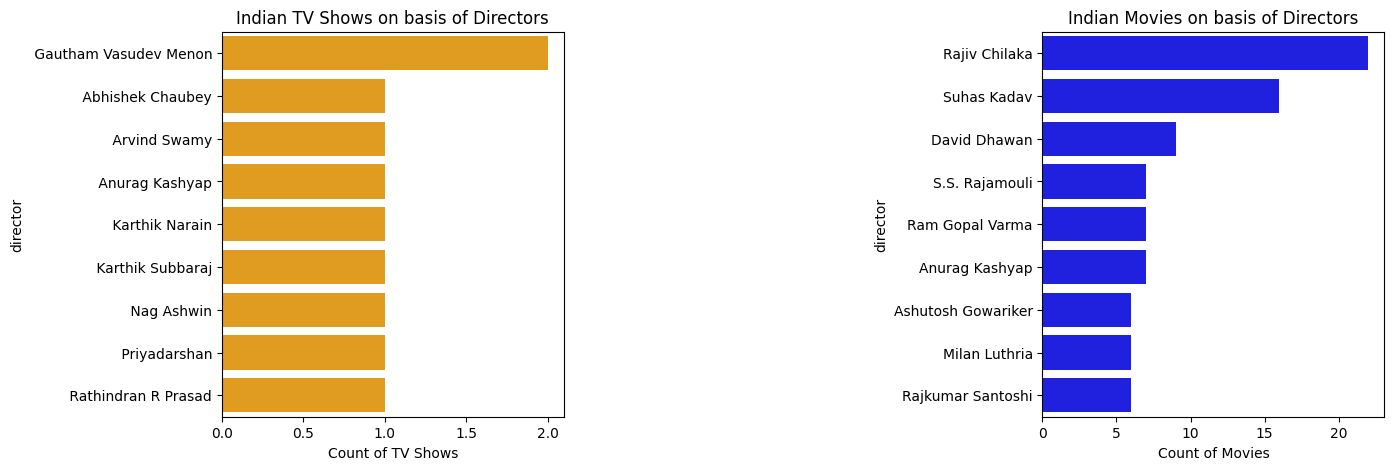

In [79]:
shows = indian_shows.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows = shows[shows['director'] != 'Unknown director']

movies = indian_movies.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
movies = movies[movies['director'] != 'Unknown director']

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=shows, x='title',y='director',color='orange')
plt.xlabel('Count of TV Shows')
plt.title(f"Indian TV Shows on basis of Directors")

plt.subplot(1,3,3)
sns.barplot(data=movies, x='title',y='director',color='blue')
plt.xlabel('Count of Movies')
plt.title(f"Indian Movies on basis of Directors")
plt.show()

Gautham vasudev menon, Abhishek chaubey and Arvind Swamy are popular directors in Tvshows and Rajiv chilaka, Suhas kadav and David Dhawan are popular directors in Movies at Netflix

In [80]:
#Lets analyse the Actor and Director Combination for Indian Movies and TV Shows
indian_movies['actor_director_combi'] = indian_movies.cast.str.cat(indian_movies.director,sep=' and ')
movies_actor_director = indian_movies[indian_movies['director'] != 'Unknown director']
movies_actor_director = movies_actor_director[movies_actor_director['cast'] != 'Unknow Actor']
movies_actor_director.head()

<ipython-input-80-48f7757079ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indian_movies['actor_director_combi'] = indian_movies.cast.str.cat(indian_movies.director,sep=' and ')


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,modified_date,year_added,month_added,week_added,actor_director_combi
621,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,India,Comedies,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,2021,9,38,Kamal Hassan and K.S. Ravikumar
622,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,India,International Movies,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,2021,9,38,Kamal Hassan and K.S. Ravikumar
629,Avvai Shanmughi,K.S. Ravikumar,Nassar,India,Comedies,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,2021,9,38,Nassar and K.S. Ravikumar
630,Avvai Shanmughi,K.S. Ravikumar,Nassar,India,International Movies,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,2021,9,38,Nassar and K.S. Ravikumar
631,Avvai Shanmughi,K.S. Ravikumar,S.P. Balasubrahmanyam,India,Comedies,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,2021,9,38,S.P. Balasubrahmanyam and K.S. Ravikumar


In [81]:
indian_shows['actor_director_combi'] = indian_shows.cast.str.cat(indian_shows.director,sep=' and ')
shows_actor_director = indian_shows[indian_shows['director']!='Unknown director']
shows_actor_director = shows_actor_director[shows_actor_director['cast']!='Unknow Actor']
shows_actor_director.head()

<ipython-input-81-daf455ae5963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indian_shows['actor_director_combi'] = indian_shows.cast.str.cat(indian_shows.director,sep=' and ')


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,modified_date,year_added,month_added,week_added,actor_director_combi
7005,Navarasa,Bejoy Nambiar,Suriya,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,2021,8,31,Suriya and Bejoy Nambiar
7006,Navarasa,Bejoy Nambiar,Vijay Sethupathi,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,2021,8,31,Vijay Sethupathi and Bejoy Nambiar
7007,Navarasa,Bejoy Nambiar,Revathy,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,2021,8,31,Revathy and Bejoy Nambiar
7008,Navarasa,Bejoy Nambiar,Prakash Raj,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,2021,8,31,Prakash Raj and Bejoy Nambiar
7009,Navarasa,Bejoy Nambiar,Siddarth,India,TV Shows,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,2021,8,31,Siddarth and Bejoy Nambiar


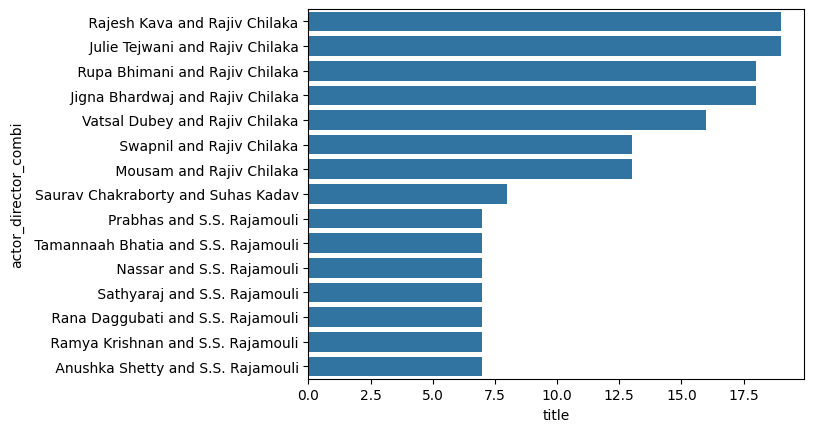

In [82]:
movies = movies_actor_director.groupby('actor_director_combi')['title'].nunique().sort_values(ascending=False).reset_index()[:15]
sns.barplot(data=movies, y='actor_director_combi',x='title')
plt.show()

first 7 top Movies has same director as Rajiv Chilaka, popular actor and director combo are,
* Rajesh kava and Rajiv Chilaka
* Julie Tejwani and Rajiv Chilaka
* Rupa Bhimani and Rajiv Chilaka

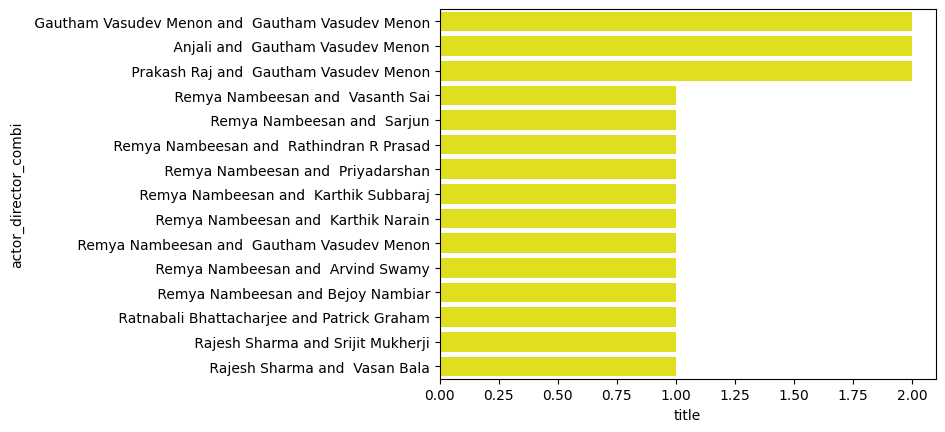

In [83]:
shows = shows_actor_director.groupby('actor_director_combi')['title'].nunique().sort_values(ascending=False).reset_index()[:15]
sns.barplot(data=shows, x='title',y='actor_director_combi',color='yellow')
plt.show()

Popular actor and director combo in TV shows are,
* Gautham Vasudev Menon and Gautham Vasudev Menon
* Anjali and Gautham Vasudev Menon
* Prakash raj and Gautham Vasudev Menon

## Univariate Analysis separately for shows in Japan


In [105]:
# We will analyze Japan and South Korea for TV Shows:
japan_shows = final[(final['country']=='Japan') & (final['type']=='TV Show')]
sk_shows = final[(final['country']=='South Korea') & (final['type']=='TV Show')]

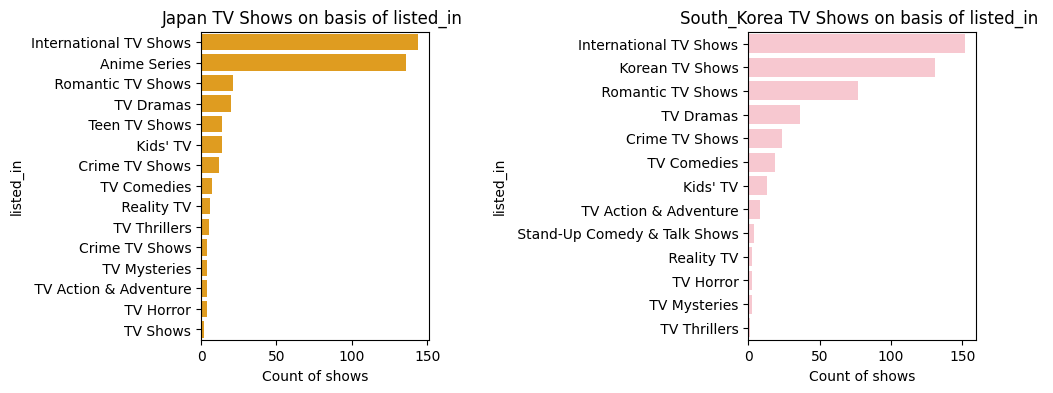

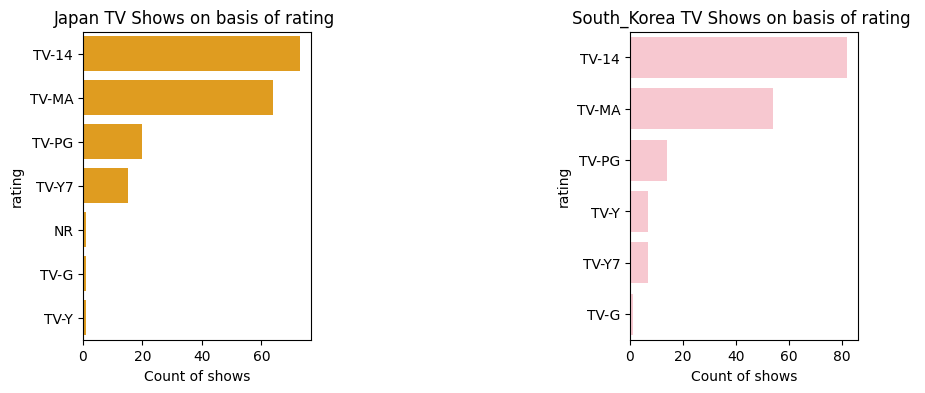

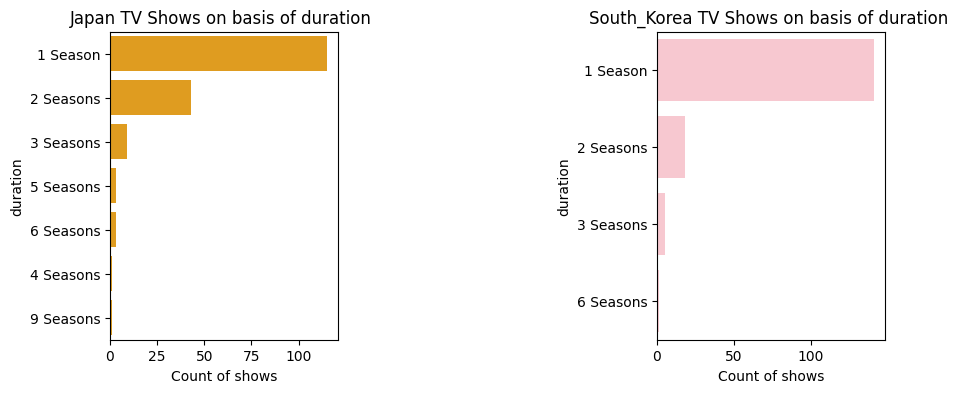

In [106]:
col = ['listed_in','rating', 'duration']
for i in col:
  shows_jp = japan_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:15]
  shows_sk = sk_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:15]

  plt.figure(figsize=(10,4))
  plt.subplot(1,3,1)
  sns.barplot(data=shows_jp, x='title',y= i,color='orange')
  plt.title(f"Japan TV Shows on basis of {i} ")
  plt.xlabel("Count of shows")

  plt.subplot(1,3,3)
  sns.barplot(data=shows_sk, x='title',y= i,color='pink')
  plt.title(f"South_Korea TV Shows on basis of {i} ")
  plt.xlabel("Count of shows")
  plt.show()

* International TV Shows, Anime series, romantic tvshows, tv drama and teen tv shows are popular in Japan and Internatinal tvshows, korean tvshows, romantic tvshows, tv dramas and crime tvshows are popular in south korea
* Top 3 rating for both Japan and South Korea are content above 14yrs, Mature audience content and Parental Guidence content
* for Both Japan and South korea Season 1 is highest in duration  

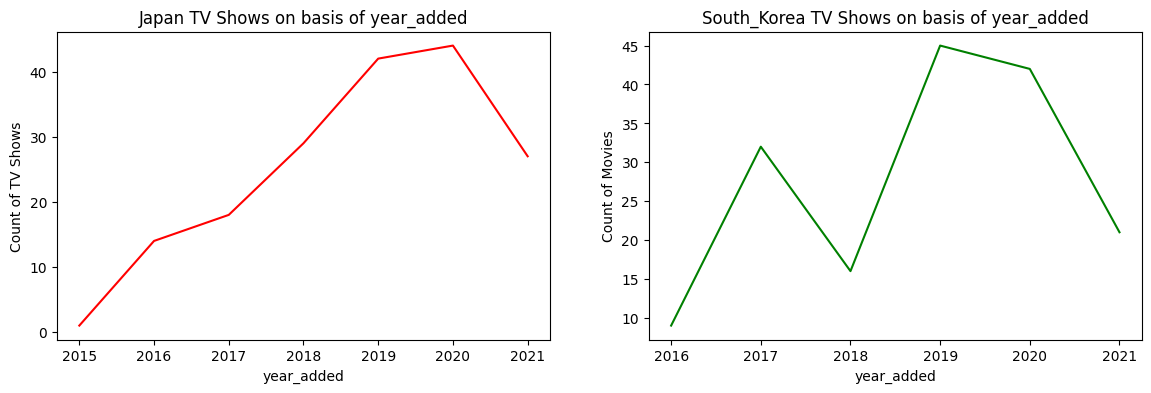

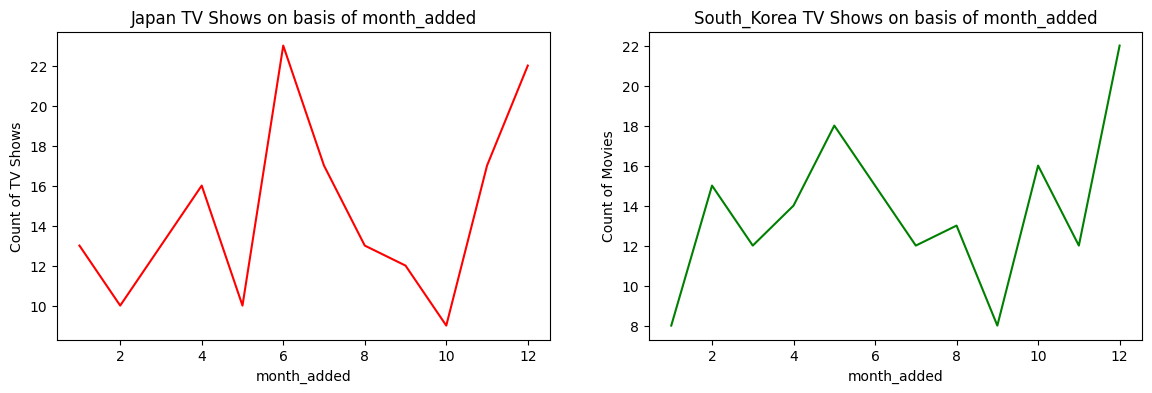

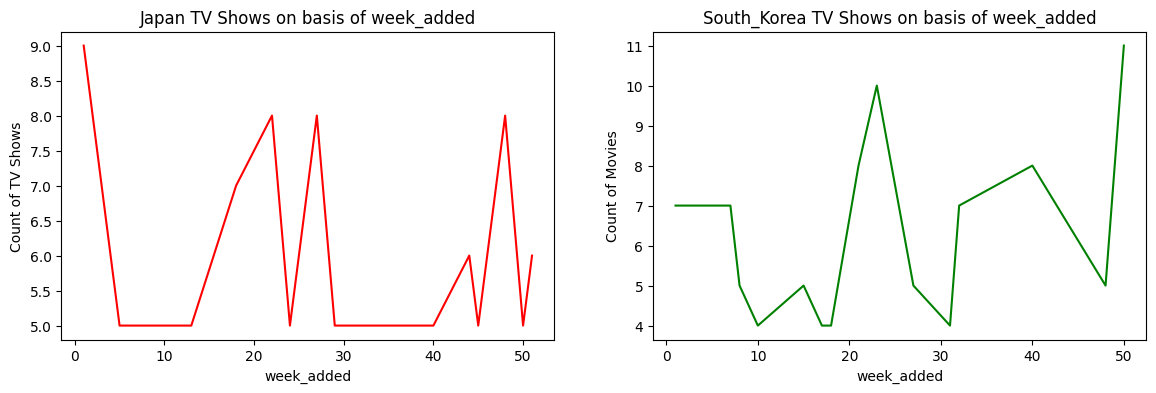

In [108]:
col = ['year_added', 'month_added', 'week_added']
for i in col:
  shows_jp = japan_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:15]
  shows_sk = sk_shows.groupby(i)['title'].nunique().sort_values(ascending=False).reset_index()[:15]

  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.lineplot(data=shows_jp, y='title',x=i,color='red')
  plt.ylabel('Count of TV Shows')
  plt.title(f"Japan TV Shows on basis of {i}")

  plt.subplot(1,2,2)
  sns.lineplot(data=shows_sk, y='title',x=i,color='green')
  plt.ylabel('Count of Movies')
  plt.title(f"South_Korea TV Shows on basis of {i}")
  plt.show()

* TV shows in Japan has increased from 2017 till 2020 and started dropping from 2020 till 20121 and TV shows in South Korea there is drop from 2017 to 2018 and increase till 2019 and dropped from 2019 till 2021
* TV shows in Japan are added mainly on April, June and December and for south korea its added on Feb, May and December


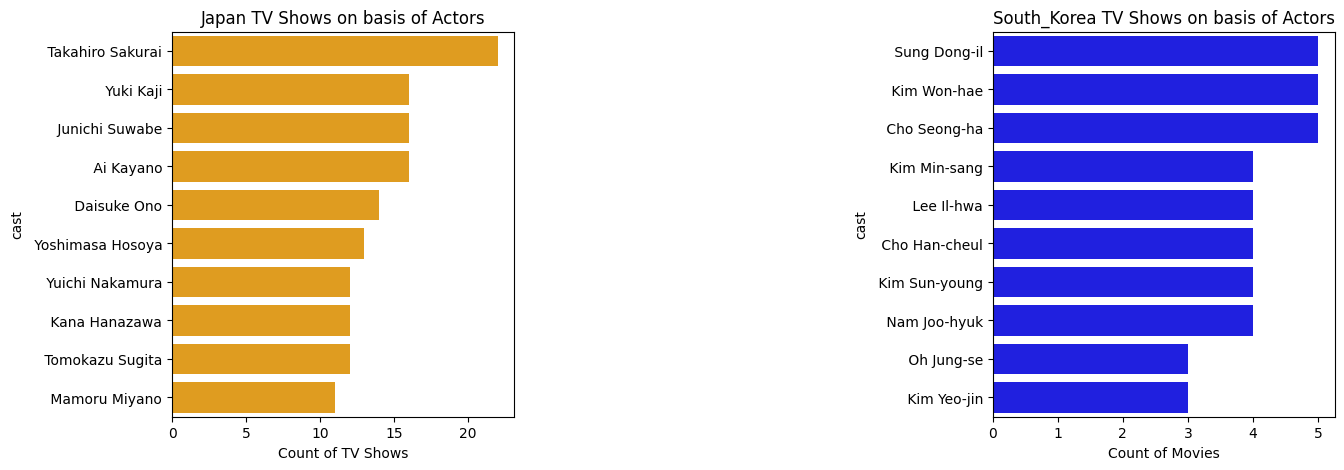

In [109]:
shows_jp = japan_shows.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows_jp = shows_jp[shows_jp['cast'] != 'Unknow Actor']

shows_sk = sk_shows.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows_sk = shows_sk[shows_sk['cast'] != 'Unknow Actor']

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=shows_jp, x='title',y='cast',color='orange')
plt.xlabel('Count of TV Shows')
plt.title(f"Japan TV Shows on basis of Actors")

plt.subplot(1,3,3)
sns.barplot(data=shows_sk, x='title',y='cast',color='blue')
plt.xlabel('Count of Movies')
plt.title(f"South_Korea TV Shows on basis of Actors")
plt.show()


Takahiro sakurai, yuki kaji, Junichi Suwabe are popular TV shows Actors in Japan and Sung Dong-il, Kim won hae, Cho Seong ha are the popular TV shows actors in South Korea

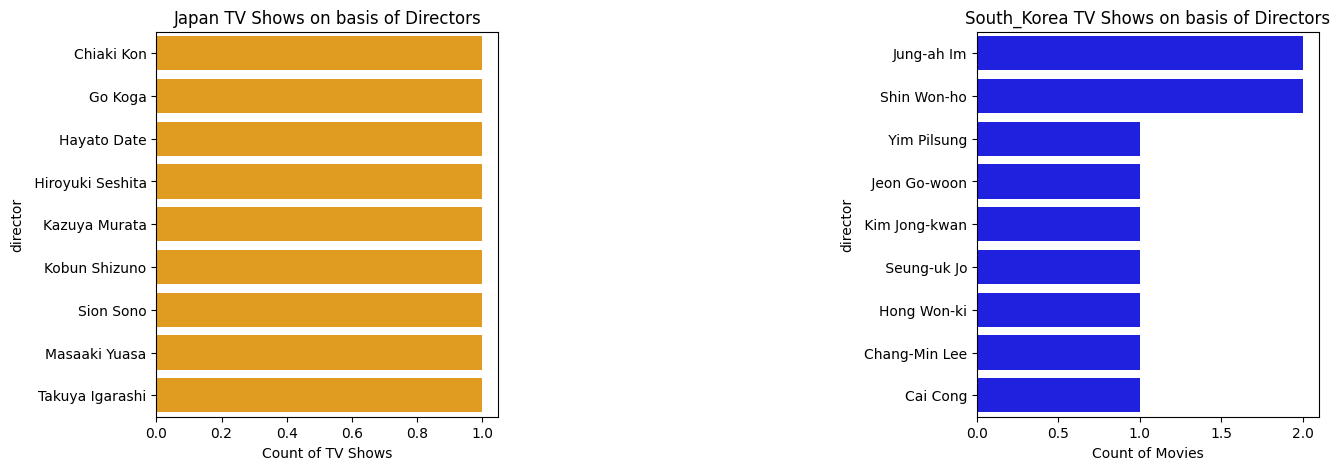

In [110]:
shows_jp = japan_shows.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows_jp = shows_jp[shows_jp['director'] != 'Unknown director']

shows_sk = sk_shows.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()[:10]
shows_sk = shows_sk[shows_sk['director'] != 'Unknown director']

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=shows_jp, x='title',y='director',color='orange')
plt.xlabel('Count of TV Shows')
plt.title(f"Japan TV Shows on basis of Directors")

plt.subplot(1,3,3)
sns.barplot(data=shows_sk, x='title',y='director',color='blue')
plt.xlabel('Count of Movies')
plt.title(f"South_Korea TV Shows on basis of Directors")
plt.show()

All the Directors in Japan have directed one TV show and for South Korea- Jung-ah Im, Shin won ho, Yim Pilsung are the popular TVshows director

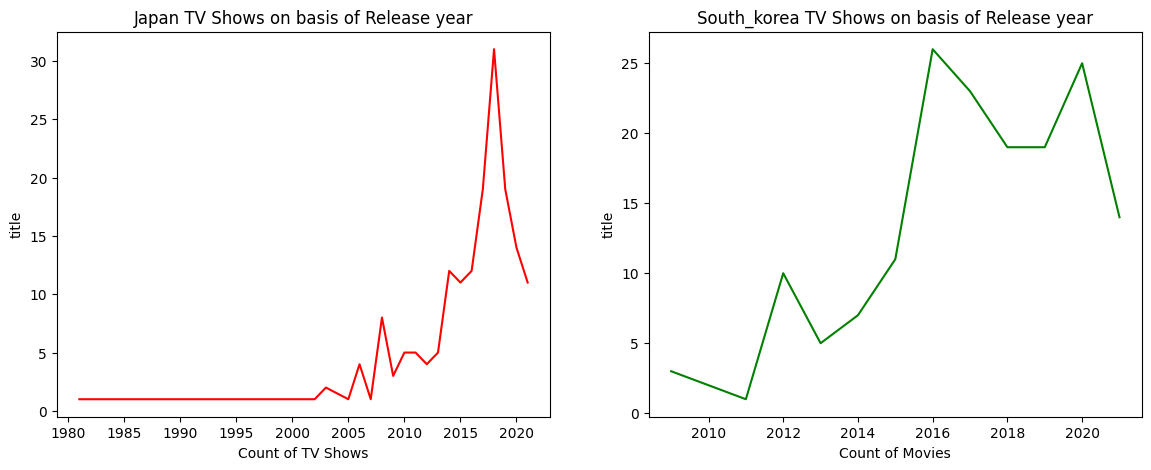

In [111]:
shows_jp = japan_shows[japan_shows['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()

shows_sk = sk_shows[sk_shows['release_year']>1980].groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.lineplot(data=shows_jp, y='title',x='release_year',color='red')
plt.xlabel('Count of TV Shows')
plt.title(f"Japan TV Shows on basis of Release year")

plt.subplot(1,2,2)
sns.lineplot(data=shows_sk, y='title',x='release_year',color='green')
plt.xlabel('Count of Movies')
plt.title(f"South_korea TV Shows on basis of Release year")
plt.show()

There is a huge drop in TV shows in Japan from 2019 and The number of TV Shows in S.Korea reached peak in 2016. It then reached
a second peak in 2019. It has reduced in 2021 from 2020.

## EDA Insights:
* The Dataset has 8807 rows and 12 columns
* Dataset had 4307 null values mainly in Director, cast, country,rating and duration column
* Rating column had 3 entries which belongs to duration column, it was later replaced
* Cast, Directors, listed_in and country columns had multiple values in each cell hence we unnested these columns separately with title column with .str.split() and explode() function and then merged all 4 Dataframes.
* Merged the unnested dataframe with the original dataframe to get the final dataframe to work on analysis.
* Replaced Null values in director column with 'Unknown director'
* Replaced Null values in Cast column with 'Unknown Actor'
* Replaced Null values in Rating column with 'NR'-Not rated.
* Replaced Null values in date_added with column with the mode of release year
* Replaced Null values in country column with Mode of Directors, Mode of cast and remaining null values were replaced with 'Unknown Country'
* converted movie durations in to categorical data for better analysis

## Analysis Insights:

* The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies.
* TV Shows are added in July/August and Movies in last week of the year/first month of the next year.
* For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows are also popular along with the genres in first point.
* The target audience in USA and India is recommended to be 14+ and above ratings while for Japan and south korea its 14yrs+ and mature content.
* Movies for Indian Audience has been declining since 2018.
* Anime Genre for Japan and Romantic Genre for South Korean and International Tvshows for both are popular.
* While creating content, take into consideration the popular actors/directors
for that country. Also take into account the director-actor combination which
is highly recommended.

## Recommendation for Netflix:
* Focus production and licensing on high-performing genres like Drama, Comedy, and International TV Shows across markets.
* Invest in original anime or co-productions with Japanese studios.
* Invest in Korean Romantic Drama.
* Since Indian movies are declining since 2018, it would be best to focus on original webseries rather than movies.
* Target Movie release on year end holidays - December and January
* Run local Marketing on school breaks and during festivals.
* for USA : Highlight family content, movies under 2 hours, and trending kids TV shows
* for Japan and South Korea: Push mature-rated content and international titles in user homepages.
* for India: Emphasize titles rated 14+ and above and deprioritize low-performing movie genres.
* Promote content based on popular genres such as Anime for Japan and Romantic content for South Korea
* Work with Japanes, korean and Indian Production firms to produce high qualtiy content in target genres.

